# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

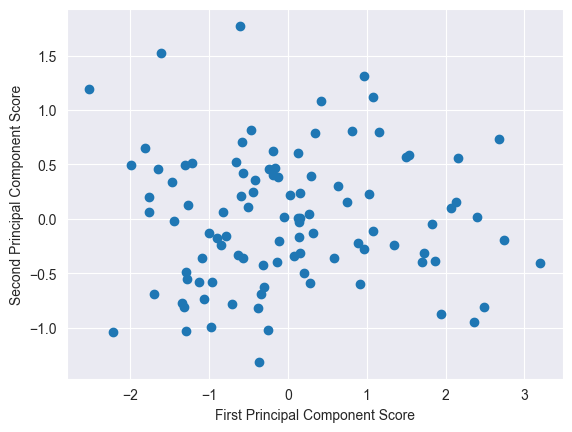

In [2]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

## What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score? What does that mean about their values in series_1, series_2, and series_3?

The three outliers in the upper left corner had their series_3 sharply decline, while series_1 and series_2 stayed normal. By looking at PC1, `[0.265, 0.301, 0.916]`, series_3 has a very high coefficient at `0.916` compared to the other two. Since PC1 is negative, this means that series_3 must be very negative. This is because `PC1 = 0.265×ser1 + 0.301×ser2 + 0.916×ser3`. Since all the coefficients are positive, the total can only be negative if series_3 is very negative due to how large it is compared to the other values. By looking at PC2, `[0.603, 0.689, -0.401]`, series_3 has a negative coefficient at `-0.401` compared to the other two. Since PC2 is positive, this means that series_3 is more negative compared to the other two. Essentially since PC2 is positive for the outliers, it means that the value of series_3 outweighs the combination of series_1 and series_2 to push it to be positive. The negative series_3 value actually adds to the positive PC2 score.

Using mock values we can see that below.
```
PC1 = 0.265×(0.55) + 0.301×(0.55) + 0.916×(-1.98) = -1.502
PC2 = 0.603×(0.55) + 0.689×(0.55) - 0.401×(-1.98) = 1.505
```

To summarize, PC1 had a low (negative) score since they are on the left. PC2 had a high (positive) score since they are on the top.

## It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

It's hard to distinguish series_1 and series_2 due to how the data was generated. Since series_2 is essentially series_1 with only 10% noise compared to series_3 having 50% noise, series_1 and series_2 are highly correlated. PC1 gives them similar weights with 0.265 and 0.301. PC2 gives them similar weights as well with 0.603 and 0.689. Additionally, looking at the explained variance ratio (`[0.79916477 0.18990532 0.01092991]`), series_3 only accounts for 1.1% of the total variance.

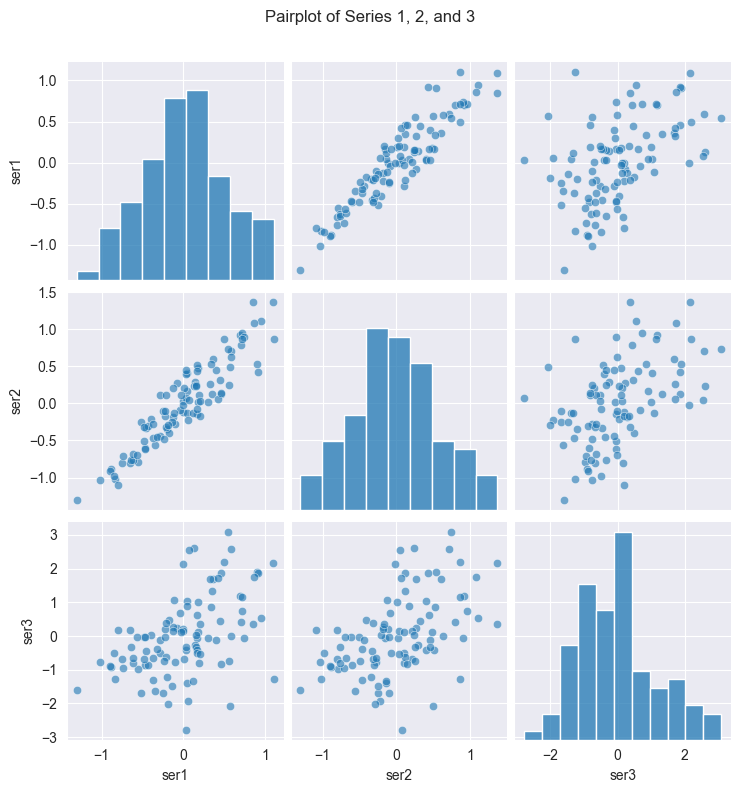

In [3]:
import seaborn as sns

g = sns.pairplot(df[['ser1', 'ser2', 'ser3']],
                 diag_kind='hist',
                 plot_kws={'alpha': 0.6})

g.fig.suptitle('Pairplot of Series 1, 2, and 3', y=1.05)
plt.show()

We can clearly see with the pairplot that series_1 and series_2 have a strong linear relationship. We can also see that series_1 and series_2 have a wider almost cloud like relationship with series_3. This is due to the 50% noise. You really cannot distinguish between series_1 and series_2 at all due to the fact there's only 10% noise.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

## 3.1 Kidney Disease Datasets

Below are analysis on the three kidney disease datasets:
1. Chronic Kidney Disease (CKD)
2. Diabetic Nephropathy
3. Acute Kidney Injury (AKI)

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

ckd_df = pd.read_csv('../../datasets/chronic_kidney_disease.csv')
dn_df = pd.read_csv('../../datasets/diabetic_nephropathy.csv')
aki_df = pd.read_csv('../../datasets/acute_kidney_injury.csv')

print("Datasets loaded successfully!")
print(f"CKD dataset shape: {ckd_df.shape}")
print(f"Diabetic Nephropathy dataset shape: {dn_df.shape}")
print(f"Acute Kidney Injury dataset shape: {aki_df.shape}")

Datasets loaded successfully!
CKD dataset shape: (202, 29)
Diabetic Nephropathy dataset shape: (767, 22)
Acute Kidney Injury dataset shape: (4001, 57)


## Part 1: Chronic Kidney Disease (CKD) Analysis

In [56]:
ckd_df_clean = ckd_df.iloc[2:].copy()

column_mapping = {
    'age': 'age',
    'bp (Diastolic)': 'diastolic_bp',
    'bp limit': 'bp_limit',
    'sg': 'specific_gravity',
    'al': 'albumin',
    'su': 'sugar',
    'rbc': 'red_blood_cells',
    'pc': 'pus_cell',
    'pcc': 'pus_cell_clumps',
    'ba': 'bacteria',
    'bgr': 'blood_glucose_random',
    'bu': 'blood_urea',
    'sc': 'serum_creatinine',
    'sod': 'sodium',
    'pot': 'potassium',
    'hemo': 'hemoglobin',
    'pcv': 'packed_cell_volume',
    'wbcc': 'white_blood_cell_count',
    'rbcc': 'red_blood_cell_count',
    'htn': 'hypertension',
    'dm': 'diabetes_mellitus',
    'cad': 'coronary_artery_disease',
    'appet': 'appetite',
    'pe': 'pedal_edema',
    'ane': 'anemia',
    'grf': 'glomerular_filtration_rate',
    'stage': 'stage',
    'affected': 'affected',
    'class': 'class'
}

ckd_df_clean = ckd_df_clean.rename(columns=column_mapping)

def extract_numeric_from_range(val):
    if pd.isna(val):
        return np.nan
    val_str = str(val)
    if '<' in val_str:
        return float(val_str.replace('<', '').strip()) * 0.9
    elif '≥' in val_str:
        return float(val_str.replace('≥', '').strip()) * 1.1
    elif '-' in val_str:
        parts = val_str.split('-')
        if len(parts) == 2:
            try:
                return (float(parts[0].strip()) + float(parts[1].strip())) / 2
            except:
                return np.nan
    else:
        try:
            return float(val_str)
        except:
            return np.nan

range_columns = ['age', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random',
                 'blood_urea', 'sodium', 'serum_creatinine', 'potassium', 'hemoglobin',
                 'packed_cell_volume', 'red_blood_cell_count', 'white_blood_cell_count',
                 'glomerular_filtration_rate']

for col in range_columns:
    if col in ckd_df_clean.columns:
        ckd_df_clean[f'{col}_numeric'] = ckd_df_clean[col].apply(extract_numeric_from_range)

### 1.1 Heatmaps for CKD Dataset

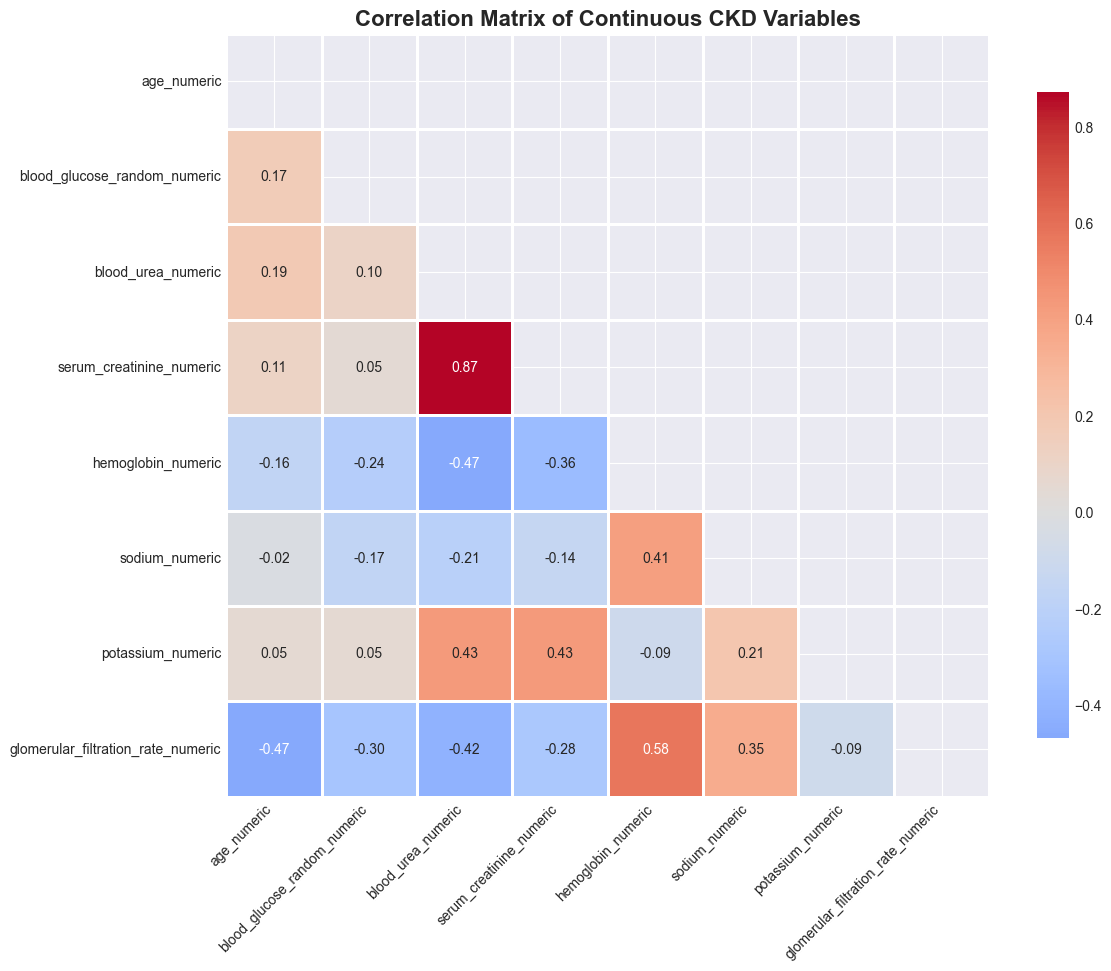

In [57]:
continuous_vars = ['age_numeric', 'blood_glucose_random_numeric', 'blood_urea_numeric',
                   'serum_creatinine_numeric', 'hemoglobin_numeric', 'sodium_numeric',
                   'potassium_numeric', 'glomerular_filtration_rate_numeric']

existing_continuous_vars = [col for col in continuous_vars if col in ckd_df_clean.columns]

plt.figure(figsize=(12, 10))
correlation_matrix = ckd_df_clean[existing_continuous_vars].corr()

# add mask to remove redundant cells
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": .8})

plt.title('Correlation Matrix of Continuous CKD Variables', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

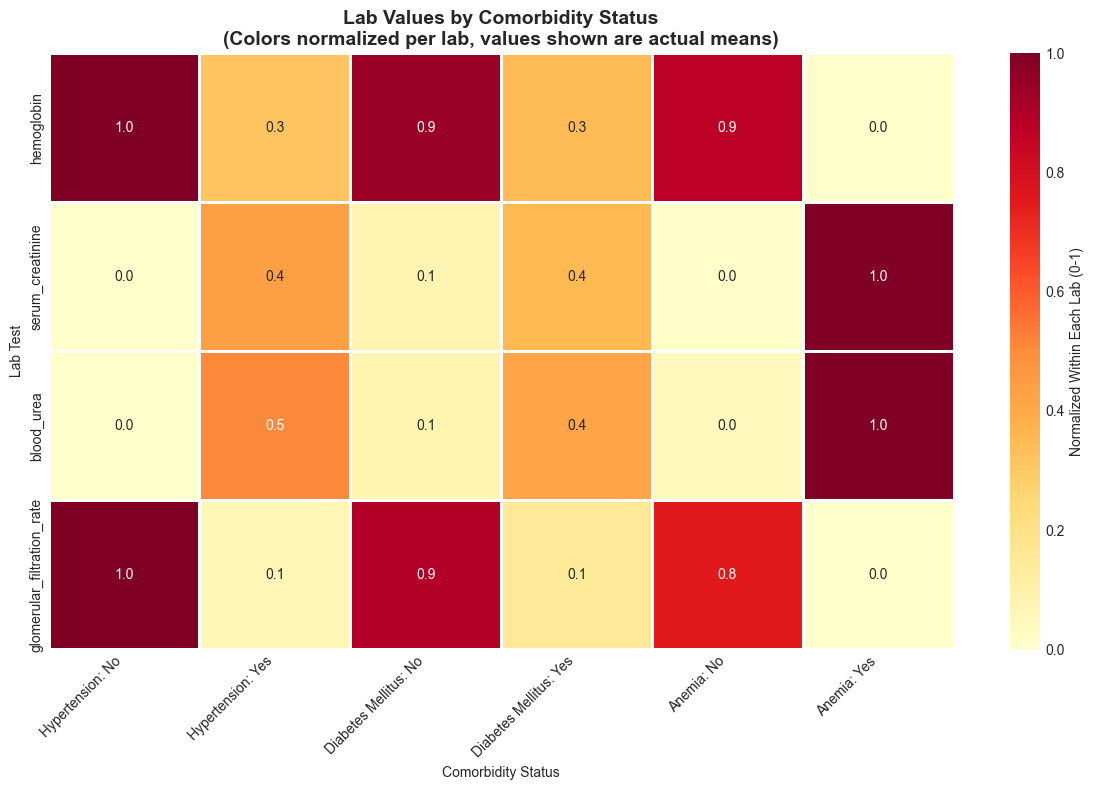

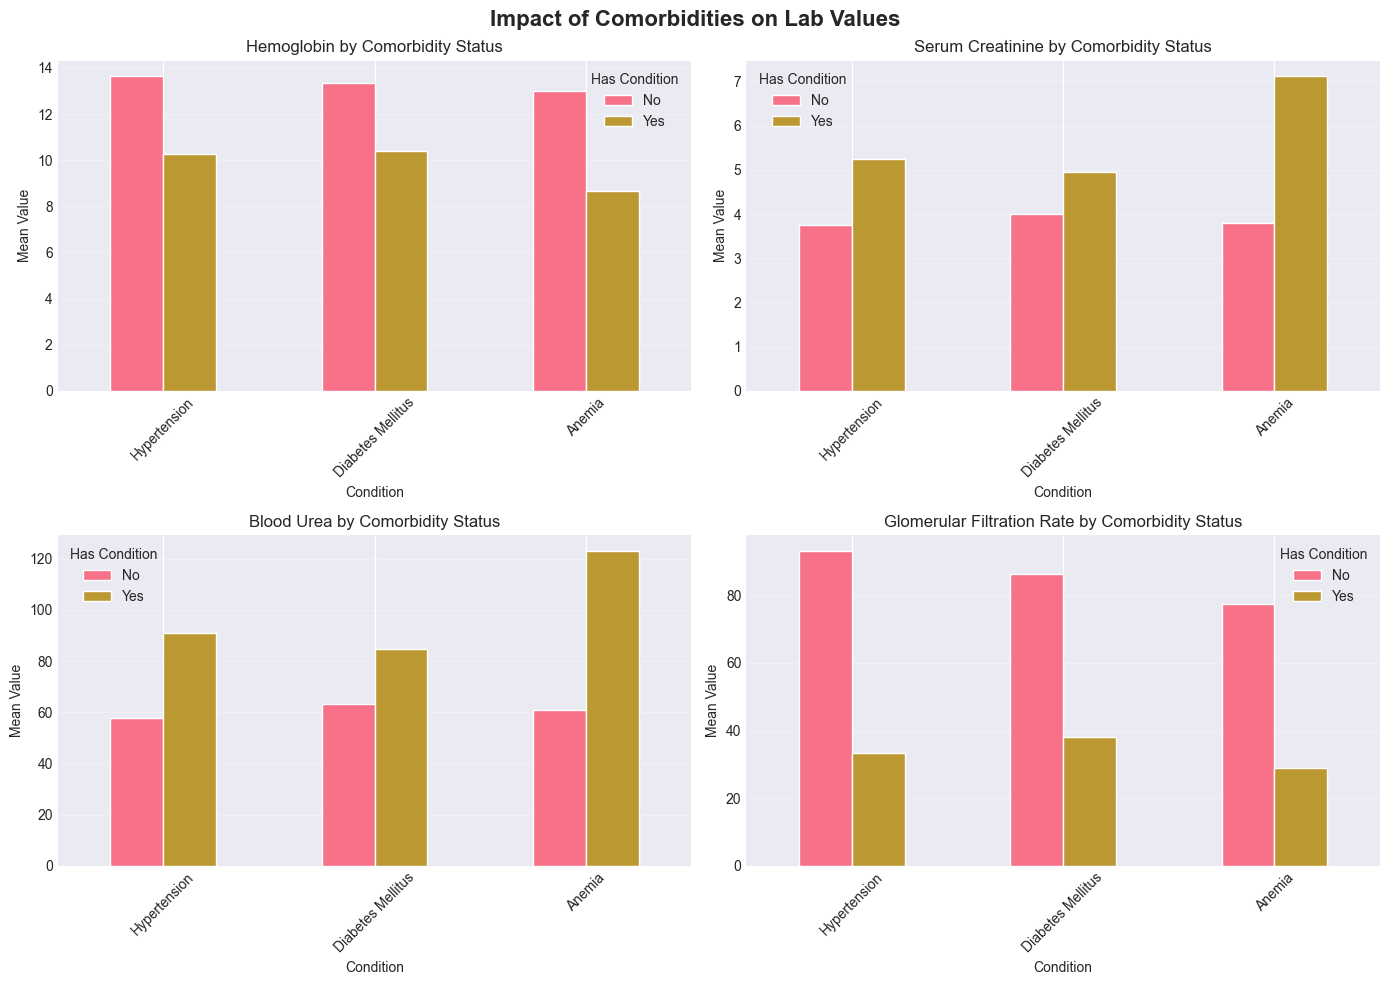

Percentage Difference in Lab Values (Yes vs No for each condition):


Hypertension:
  Hemoglobin: -24.8%
  Serum Creatinine: +39.3%
  Blood Urea: +56.9%
  Glomerular Filtration Rate: -64.2%

Diabetes Mellitus:
  Hemoglobin: -22.2%
  Serum Creatinine: +23.2%
  Blood Urea: +34.5%
  Glomerular Filtration Rate: -55.8%

Anemia:
  Hemoglobin: -33.4%
  Serum Creatinine: +87.1%
  Blood Urea: +102.3%
  Glomerular Filtration Rate: -62.7%


In [73]:
categorical_vars = ['hypertension', 'diabetes_mellitus', 'coronary_artery_disease',
                   'appetite', 'pedal_edema', 'anemia']

for cat_var in categorical_vars:
    if cat_var in ckd_df_clean.columns:
        ckd_df_clean[f'{cat_var}_num'] = pd.to_numeric(ckd_df_clean[cat_var], errors='coerce')

continuous_subset = ['hemoglobin_numeric', 'serum_creatinine_numeric',
                    'blood_urea_numeric', 'glomerular_filtration_rate_numeric']

mean_values_data = []
for cat_var in ['hypertension_num', 'diabetes_mellitus_num', 'anemia_num']:
    if cat_var in ckd_df_clean.columns:
        for value in [0, 1]:
            subset = ckd_df_clean[ckd_df_clean[cat_var] == value]
            if len(subset) > 0:
                condition_name = cat_var.replace('_num', '').replace('_', ' ').title()
                row_data = {'Condition': f'{condition_name}: {"Yes" if value == 1 else "No"}'}
                for cont_var in continuous_subset:
                    if cont_var in subset.columns:
                        row_data[cont_var.replace('_numeric', '')] = subset[cont_var].mean()
                mean_values_data.append(row_data)

mean_values_df = pd.DataFrame(mean_values_data).set_index('Condition')

mean_values_normalized = mean_values_df.T
for lab in mean_values_normalized.index:
    min_val = mean_values_normalized.loc[lab].min()
    max_val = mean_values_normalized.loc[lab].max()
    if max_val > min_val:
        mean_values_normalized.loc[lab] = (mean_values_normalized.loc[lab] - min_val) / (max_val - min_val)

plt.figure(figsize=(12, 8))
sns.heatmap(mean_values_normalized,
            annot=mean_values_df.T.round(1),
            fmt='.1f',
            cmap='YlOrRd',
            cbar_kws={'label': 'Normalized Within Each Lab (0-1)'},
            linewidths=1)

plt.title('Lab Values by Comorbidity Status\n(Colors normalized per lab, values shown are actual means)',
          fontsize=14, fontweight='bold')
plt.xlabel('Comorbidity Status')
plt.ylabel('Lab Test')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, lab in enumerate(continuous_subset):
    lab_name = lab.replace('_numeric', '').replace('_', ' ').title()

    data_for_plot = []
    for condition in ['hypertension', 'diabetes_mellitus', 'anemia']:
        if f'{condition}_num' in ckd_df_clean.columns:
            no_condition = ckd_df_clean[ckd_df_clean[f'{condition}_num'] == 0][lab].mean()
            yes_condition = ckd_df_clean[ckd_df_clean[f'{condition}_num'] == 1][lab].mean()
            data_for_plot.append({
                'Condition': condition.replace('_', ' ').title(),
                'No': no_condition,
                'Yes': yes_condition
            })

    plot_df = pd.DataFrame(data_for_plot).set_index('Condition')
    plot_df.plot(kind='bar', ax=axes[idx], rot=45)
    axes[idx].set_title(f'{lab_name} by Comorbidity Status')
    axes[idx].set_ylabel('Mean Value')
    axes[idx].legend(title='Has Condition')
    axes[idx].grid(axis='y', alpha=0.3)

plt.suptitle('Impact of Comorbidities on Lab Values', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("Percentage Difference in Lab Values (Yes vs No for each condition):\n")
for condition in ['hypertension', 'diabetes_mellitus', 'anemia']:
    if f'{condition}_num' in ckd_df_clean.columns:
        print(f"\n{condition.replace('_', ' ').title()}:")
        for lab in continuous_subset:
            no_val = ckd_df_clean[ckd_df_clean[f'{condition}_num'] == 0][lab].mean()
            yes_val = ckd_df_clean[ckd_df_clean[f'{condition}_num'] == 1][lab].mean()
            pct_diff = ((yes_val - no_val) / no_val) * 100
            lab_name = lab.replace('_numeric', '').replace('_', ' ').title()
            print(f"  {lab_name}: {pct_diff:+.1f}%")

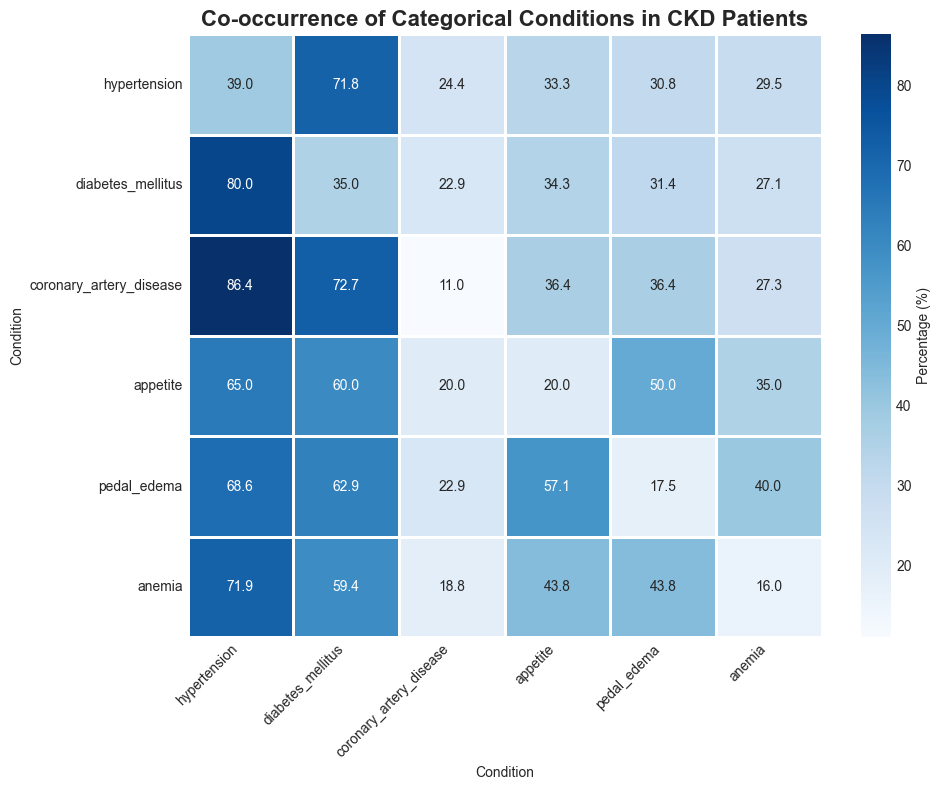

Note: Diagonal shows prevalence of each condition.
Off-diagonal shows % of patients with row condition who also have column condition.


In [74]:
categorical_binary_vars = ['hypertension_num', 'diabetes_mellitus_num', 'coronary_artery_disease_num',
                          'appetite_num', 'pedal_edema_num', 'anemia_num']

for var in ['coronary_artery_disease', 'appetite', 'pedal_edema']:
    if var in ckd_df_clean.columns:
        ckd_df_clean[f'{var}_num'] = pd.to_numeric(ckd_df_clean[var], errors='coerce')

existing_cat_vars = [col for col in categorical_binary_vars if col in ckd_df_clean.columns]

co_occurrence_matrix = pd.DataFrame(index=[var.replace('_num', '') for var in existing_cat_vars],
                                  columns=[var.replace('_num', '') for var in existing_cat_vars])

for i, var1 in enumerate(existing_cat_vars):
    for j, var2 in enumerate(existing_cat_vars):
        if i == j:
            co_occurrence_matrix.iloc[i, j] = (ckd_df_clean[var1] == 1).mean() * 100
        else:
            both_conditions = ((ckd_df_clean[var1] == 1) & (ckd_df_clean[var2] == 1)).sum()
            total_with_var1 = (ckd_df_clean[var1] == 1).sum()
            if total_with_var1 > 0:
                co_occurrence_matrix.iloc[i, j] = (both_conditions / total_with_var1) * 100
            else:
                co_occurrence_matrix.iloc[i, j] = 0

co_occurrence_matrix = co_occurrence_matrix.astype(float)

plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_matrix, 
            annot=True, 
            fmt='.1f',
            cmap='Blues',
            cbar_kws={'label': 'Percentage (%)'},
            linewidths=1)

plt.title('Co-occurrence of Categorical Conditions in CKD Patients', fontsize=16, fontweight='bold')
plt.xlabel('Condition')
plt.ylabel('Condition')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("Note: Diagonal shows prevalence of each condition.")
print("Off-diagonal shows % of patients with row condition who also have column condition.")

### 1.2 Bubble Plots for CKD Dataset

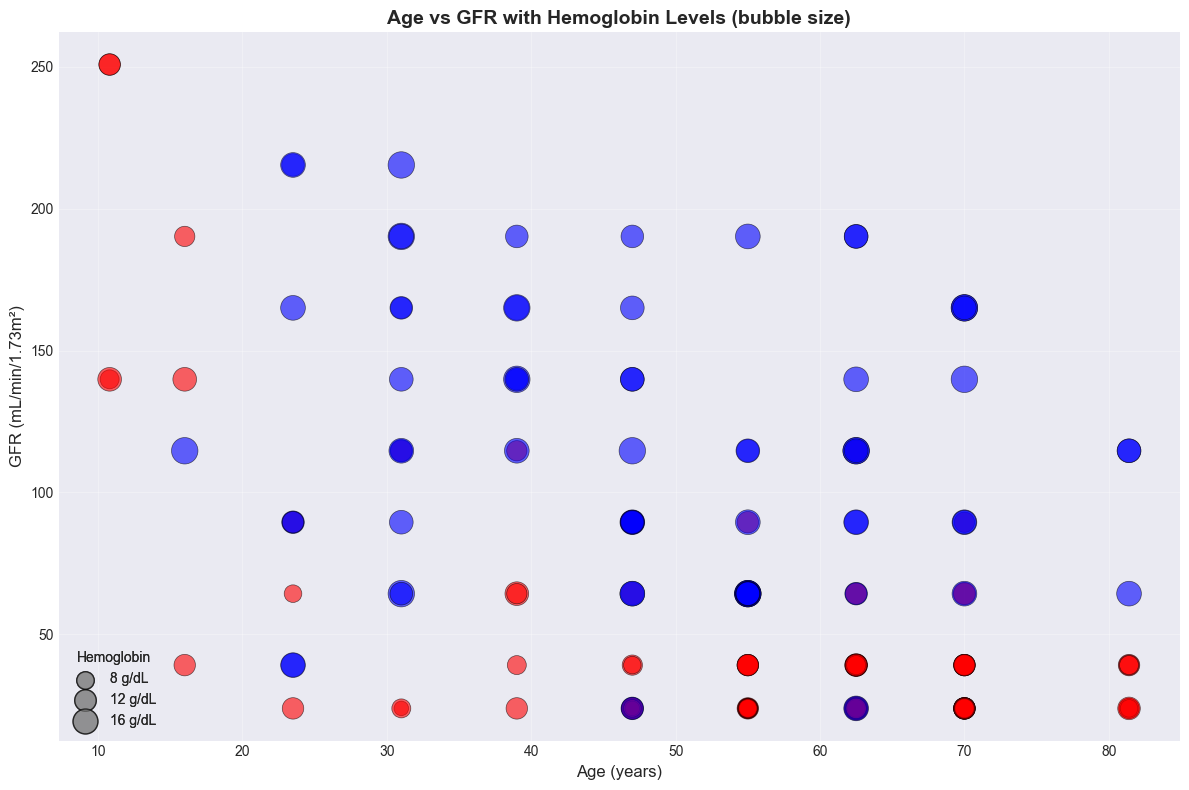

In [75]:
fig, ax = plt.subplots(figsize=(12, 8))

bubble_data = ckd_df_clean[['age_numeric', 'glomerular_filtration_rate_numeric', 
                            'hemoglobin_numeric', 'class']].dropna()

ckd_data = bubble_data[bubble_data['class'] == 'ckd']
notckd_data = bubble_data[bubble_data['class'] == 'notckd']

scatter1 = ax.scatter(ckd_data['age_numeric'], 
                     ckd_data['glomerular_filtration_rate_numeric'],
                     s=ckd_data['hemoglobin_numeric'] * 20,
                     alpha=0.6,
                     c='red',
                     edgecolors='black',
                     linewidth=0.5,
                     label='CKD')

scatter2 = ax.scatter(notckd_data['age_numeric'], 
                     notckd_data['glomerular_filtration_rate_numeric'],
                     s=notckd_data['hemoglobin_numeric'] * 20,
                     alpha=0.6,
                     c='blue',
                     edgecolors='black',
                     linewidth=0.5,
                     label='Not CKD')

ax.set_xlabel('Age (years)', fontsize=12)
ax.set_ylabel('GFR (mL/min/1.73m²)', fontsize=12)
ax.set_title('Age vs GFR with Hemoglobin Levels (bubble size)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

sizes = [8, 12, 16]
labels = ['8 g/dL', '12 g/dL', '16 g/dL']
legend_bubbles = []
for size, label in zip(sizes, labels):
    legend_bubbles.append(plt.scatter([], [], s=size*20, c='gray', alpha=0.6, edgecolors='black'))
legend2 = plt.legend(legend_bubbles, labels, scatterpoints=1, title='Hemoglobin', 
                    loc='lower left', bbox_to_anchor=(0, 0))
plt.gca().add_artist(ax.get_legend())

plt.tight_layout()
plt.show()

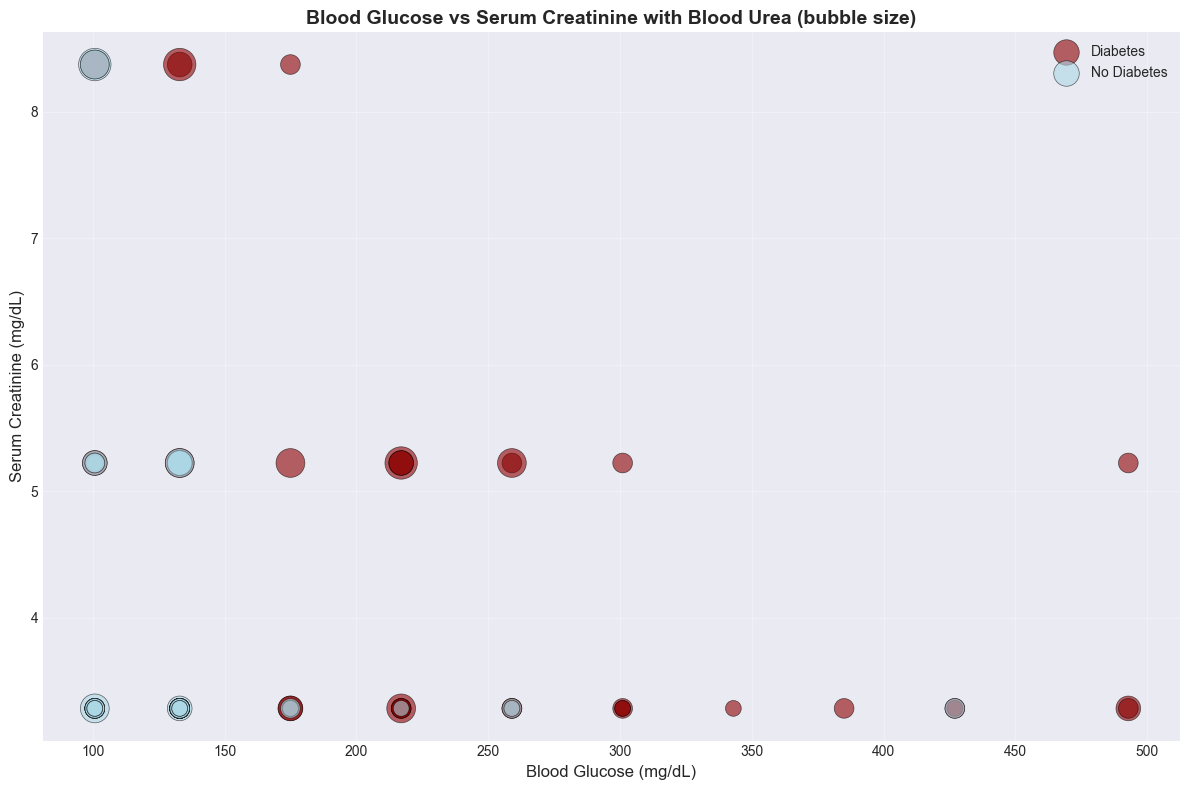

In [76]:
fig, ax = plt.subplots(figsize=(12, 8))

bubble_data2 = ckd_df_clean[['blood_glucose_random_numeric', 'serum_creatinine_numeric', 
                             'blood_urea_numeric', 'diabetes_mellitus_num']].dropna()

bubble_data2 = bubble_data2[bubble_data2['serum_creatinine_numeric'] < 10]
bubble_data2 = bubble_data2[bubble_data2['blood_urea_numeric'] < 200]

diabetes_yes = bubble_data2[bubble_data2['diabetes_mellitus_num'] == 1]
diabetes_no = bubble_data2[bubble_data2['diabetes_mellitus_num'] == 0]

scatter1 = ax.scatter(diabetes_yes['blood_glucose_random_numeric'], 
                     diabetes_yes['serum_creatinine_numeric'],
                     s=diabetes_yes['blood_urea_numeric'] * 3,
                     alpha=0.6,
                     c='darkred',
                     edgecolors='black',
                     linewidth=0.5,
                     label='Diabetes')

scatter2 = ax.scatter(diabetes_no['blood_glucose_random_numeric'], 
                     diabetes_no['serum_creatinine_numeric'],
                     s=diabetes_no['blood_urea_numeric'] * 3,
                     alpha=0.6,
                     c='lightblue',
                     edgecolors='black',
                     linewidth=0.5,
                     label='No Diabetes')

ax.set_xlabel('Blood Glucose (mg/dL)', fontsize=12)
ax.set_ylabel('Serum Creatinine (mg/dL)', fontsize=12)
ax.set_title('Blood Glucose vs Serum Creatinine with Blood Urea (bubble size)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

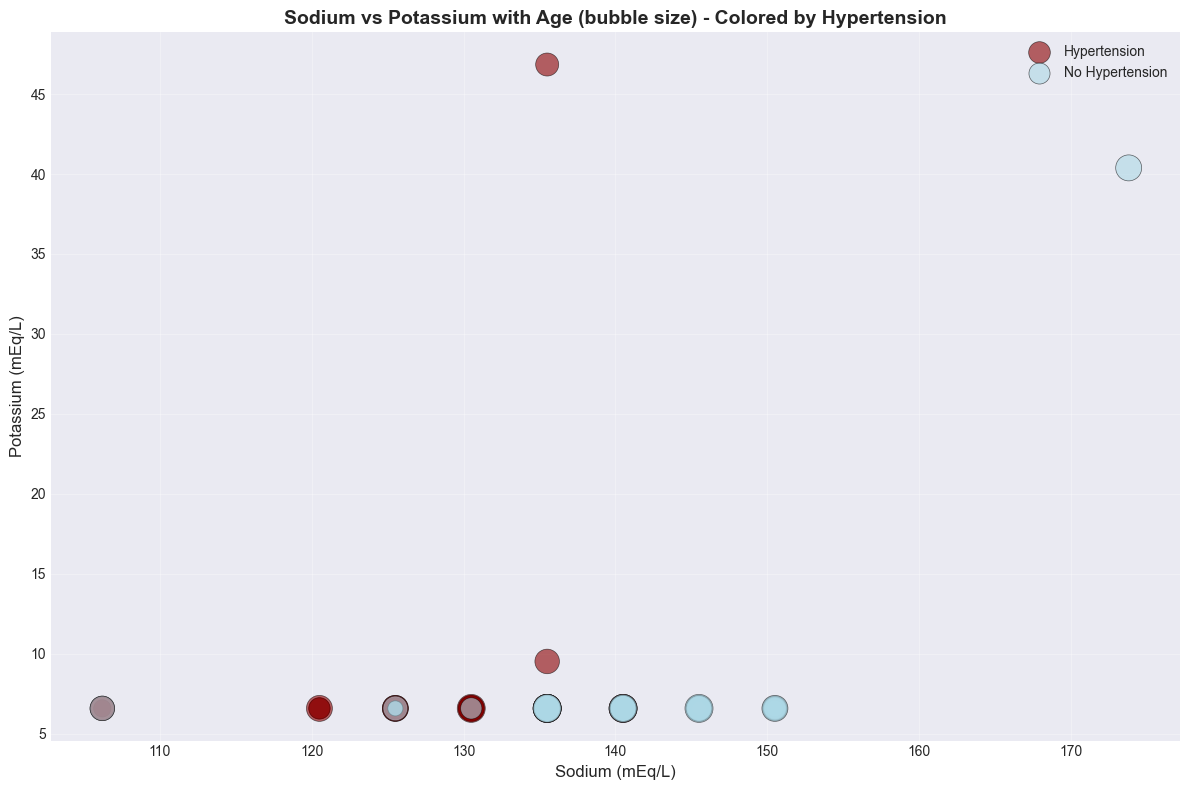

In [77]:
fig, ax = plt.subplots(figsize=(12, 8))

bubble_data3 = ckd_df_clean[['sodium_numeric', 'potassium_numeric', 
                             'age_numeric', 'hypertension_num']].dropna()

htn_yes = bubble_data3[bubble_data3['hypertension_num'] == 1]
htn_no = bubble_data3[bubble_data3['hypertension_num'] == 0]

scatter1 = ax.scatter(htn_yes['sodium_numeric'], 
                     htn_yes['potassium_numeric'],
                     s=htn_yes['age_numeric'] * 5,
                     alpha=0.6,
                     c='darkred',
                     edgecolors='black',
                     linewidth=0.5,
                     label='Hypertension')

scatter2 = ax.scatter(htn_no['sodium_numeric'], 
                     htn_no['potassium_numeric'],
                     s=htn_no['age_numeric'] * 5,
                     alpha=0.6,
                     c='lightblue',
                     edgecolors='black',
                     linewidth=0.5,
                     label='No Hypertension')

ax.set_xlabel('Sodium (mEq/L)', fontsize=12)
ax.set_ylabel('Potassium (mEq/L)', fontsize=12)
ax.set_title('Sodium vs Potassium with Age (bubble size) - Colored by Hypertension', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 1.3 Principal Component Analysis (PCA) for CKD Dataset

In [78]:
continuous_features = ['age_numeric', 'blood_glucose_random_numeric', 'blood_urea_numeric',
                      'serum_creatinine_numeric', 'hemoglobin_numeric', 'sodium_numeric',
                      'potassium_numeric', 'glomerular_filtration_rate_numeric']

pca_data = ckd_df_clean[continuous_features + ['class', 'hypertension_num', 'diabetes_mellitus_num']].dropna()

X = pca_data[continuous_features]
y_class = pca_data['class']
y_htn = pca_data['hypertension_num']
y_dm = pca_data['diabetes_mellitus_num']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio by component (continuous variables only):")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.4f} ({var*100:.2f}%)")

cumsum_var = np.cumsum(pca.explained_variance_ratio_)
print(f"\nCumulative variance explained by first 3 components: {cumsum_var[2]:.4f} ({cumsum_var[2]*100:.2f}%)")
print(f"Cumulative variance explained by first 2 components: {cumsum_var[1]:.4f} ({cumsum_var[1]*100:.2f}%)")

Explained variance ratio by component (continuous variables only):
PC1: 0.3725 (37.25%)
PC2: 0.1980 (19.80%)
PC3: 0.1379 (13.79%)
PC4: 0.1068 (10.68%)
PC5: 0.0702 (7.02%)
PC6: 0.0593 (5.93%)
PC7: 0.0410 (4.10%)
PC8: 0.0144 (1.44%)

Cumulative variance explained by first 3 components: 0.7084 (70.84%)
Cumulative variance explained by first 2 components: 0.5705 (57.05%)


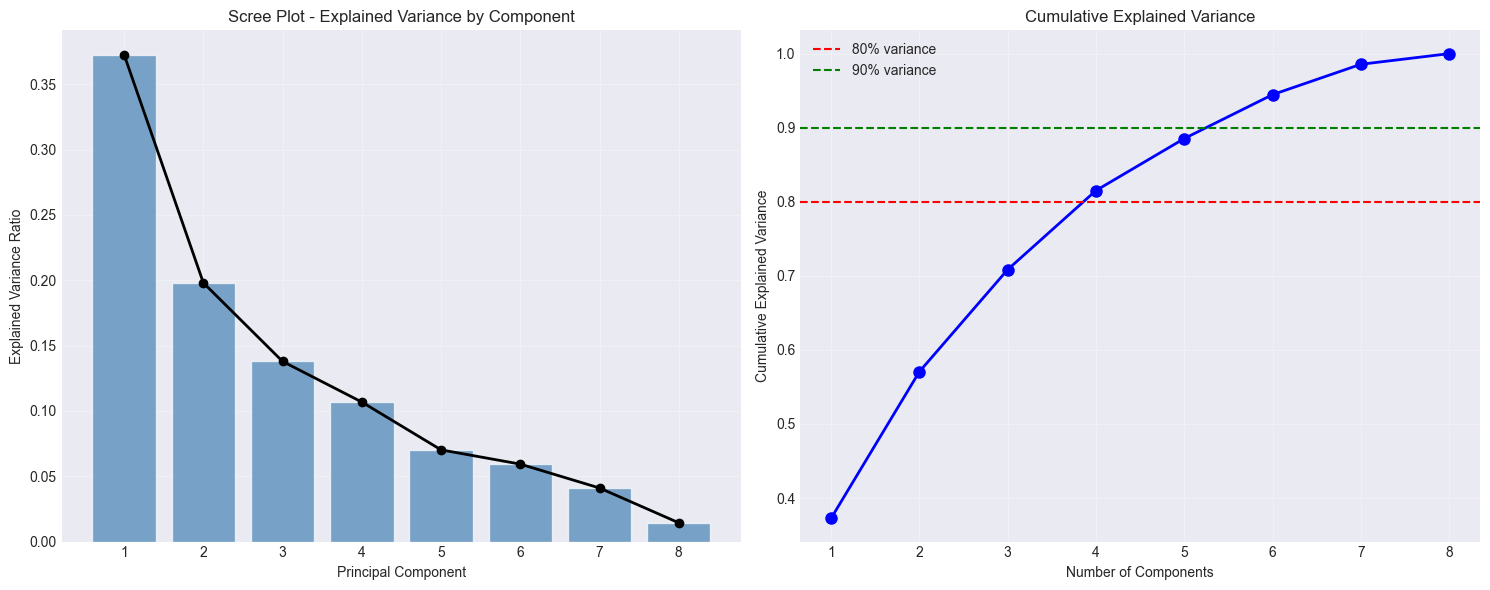

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.bar(range(1, len(pca.explained_variance_ratio_) + 1), 
        pca.explained_variance_ratio_,
        alpha=0.7,
        color='steelblue')
ax1.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_,
         'ko-',
         linewidth=2)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Scree Plot - Explained Variance by Component')
ax1.set_xticks(range(1, len(pca.explained_variance_ratio_) + 1))
ax1.grid(True, alpha=0.3)

ax2.plot(range(1, len(cumsum_var) + 1), 
         cumsum_var,
         'bo-',
         linewidth=2,
         markersize=8)
ax2.axhline(y=0.8, color='r', linestyle='--', label='80% variance')
ax2.axhline(y=0.9, color='g', linestyle='--', label='90% variance')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.set_title('Cumulative Explained Variance')
ax2.set_xticks(range(1, len(cumsum_var) + 1))
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

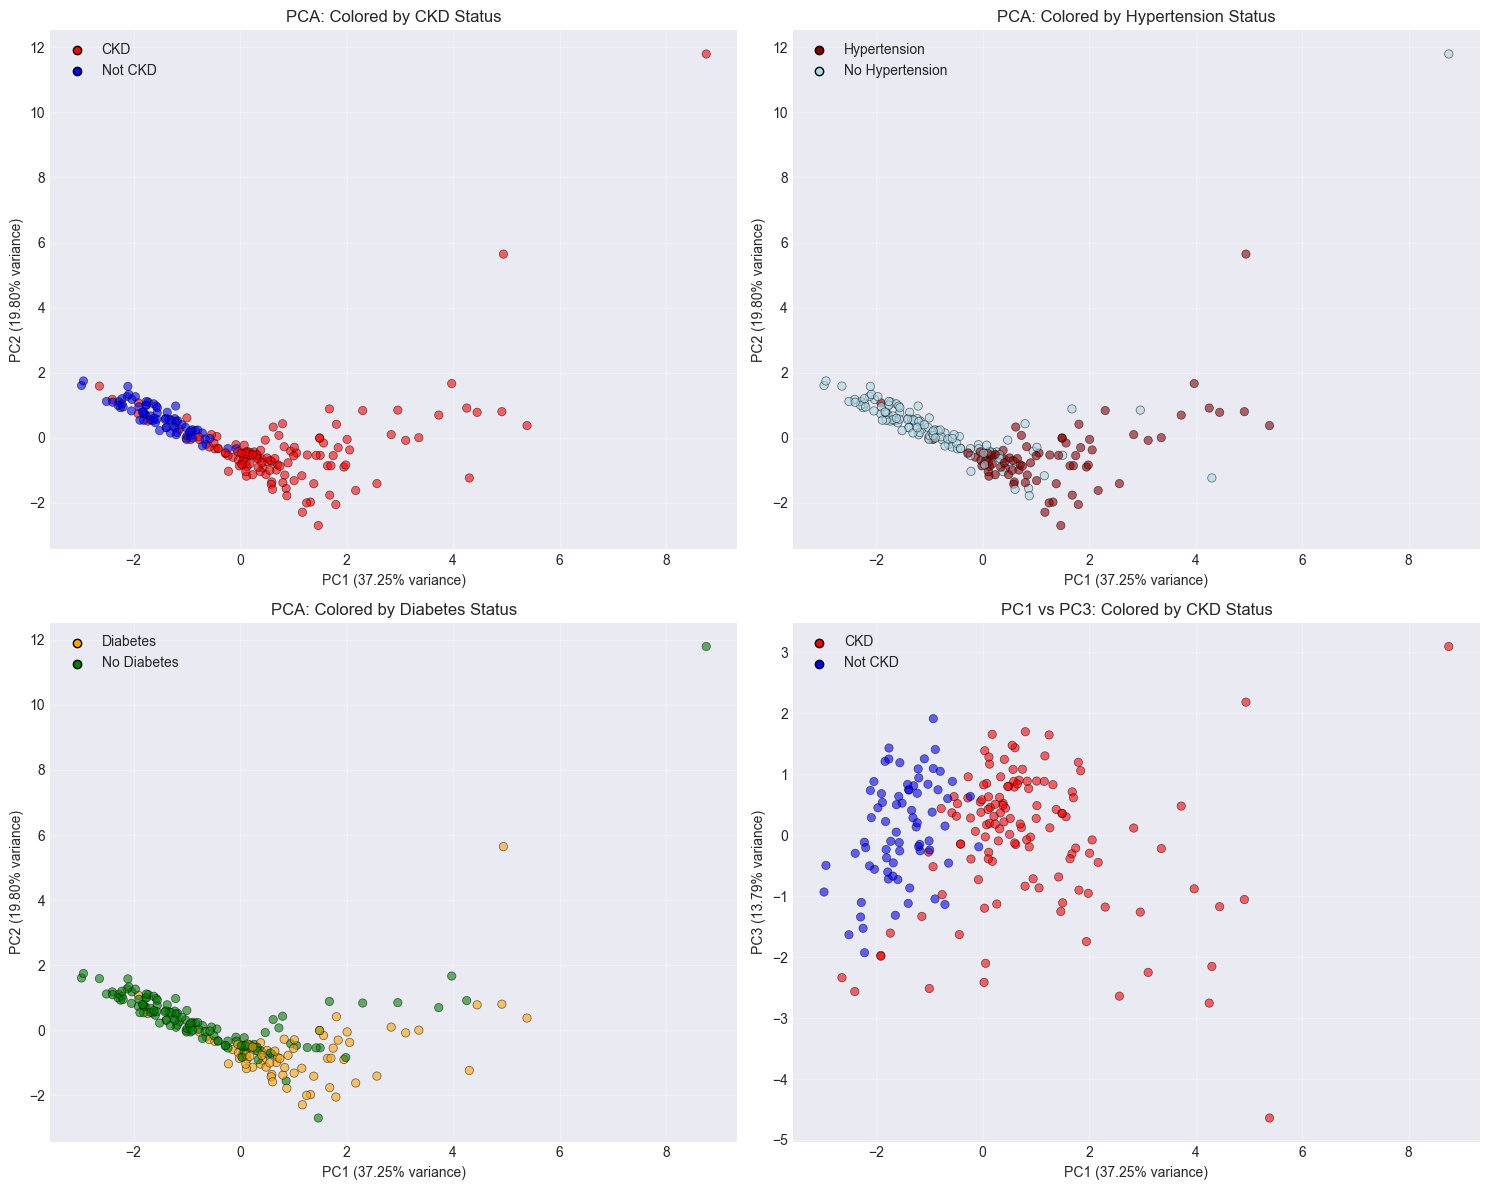

In [80]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

ax1 = axes[0, 0]
colors_class = ['red' if cls == 'ckd' else 'blue' for cls in y_class]
ax1.scatter(X_pca[:, 0], X_pca[:, 1], 
           c=colors_class, 
           alpha=0.6,
           edgecolors='black',
           linewidth=0.5)
ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
ax1.set_title('PCA: Colored by CKD Status')
red_patch = plt.scatter([], [], c='red', label='CKD', edgecolors='black')
blue_patch = plt.scatter([], [], c='blue', label='Not CKD', edgecolors='black')
ax1.legend(handles=[red_patch, blue_patch])
ax1.grid(True, alpha=0.3)

ax2 = axes[0, 1]
colors_htn = ['darkred' if htn == 1 else 'lightblue' for htn in y_htn]
ax2.scatter(X_pca[:, 0], X_pca[:, 1], 
           c=colors_htn, 
           alpha=0.6,
           edgecolors='black',
           linewidth=0.5)
ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
ax2.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
ax2.set_title('PCA: Colored by Hypertension Status')
red_patch = plt.scatter([], [], c='darkred', label='Hypertension', edgecolors='black')
blue_patch = plt.scatter([], [], c='lightblue', label='No Hypertension', edgecolors='black')
ax2.legend(handles=[red_patch, blue_patch])
ax2.grid(True, alpha=0.3)

ax3 = axes[1, 0]
colors_dm = ['orange' if dm == 1 else 'green' for dm in y_dm]
ax3.scatter(X_pca[:, 0], X_pca[:, 1], 
           c=colors_dm, 
           alpha=0.6,
           edgecolors='black',
           linewidth=0.5)
ax3.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
ax3.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
ax3.set_title('PCA: Colored by Diabetes Status')
orange_patch = plt.scatter([], [], c='orange', label='Diabetes', edgecolors='black')
green_patch = plt.scatter([], [], c='green', label='No Diabetes', edgecolors='black')
ax3.legend(handles=[orange_patch, green_patch])
ax3.grid(True, alpha=0.3)

ax4 = axes[1, 1]
ax4.scatter(X_pca[:, 0], X_pca[:, 2], 
           c=colors_class, 
           alpha=0.6,
           edgecolors='black',
           linewidth=0.5)
ax4.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
ax4.set_ylabel(f'PC3 ({pca.explained_variance_ratio_[2]:.2%} variance)')
ax4.set_title('PC1 vs PC3: Colored by CKD Status')
red_patch = plt.scatter([], [], c='red', label='CKD', edgecolors='black')
blue_patch = plt.scatter([], [], c='blue', label='Not CKD', edgecolors='black')
ax4.legend(handles=[red_patch, blue_patch])
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

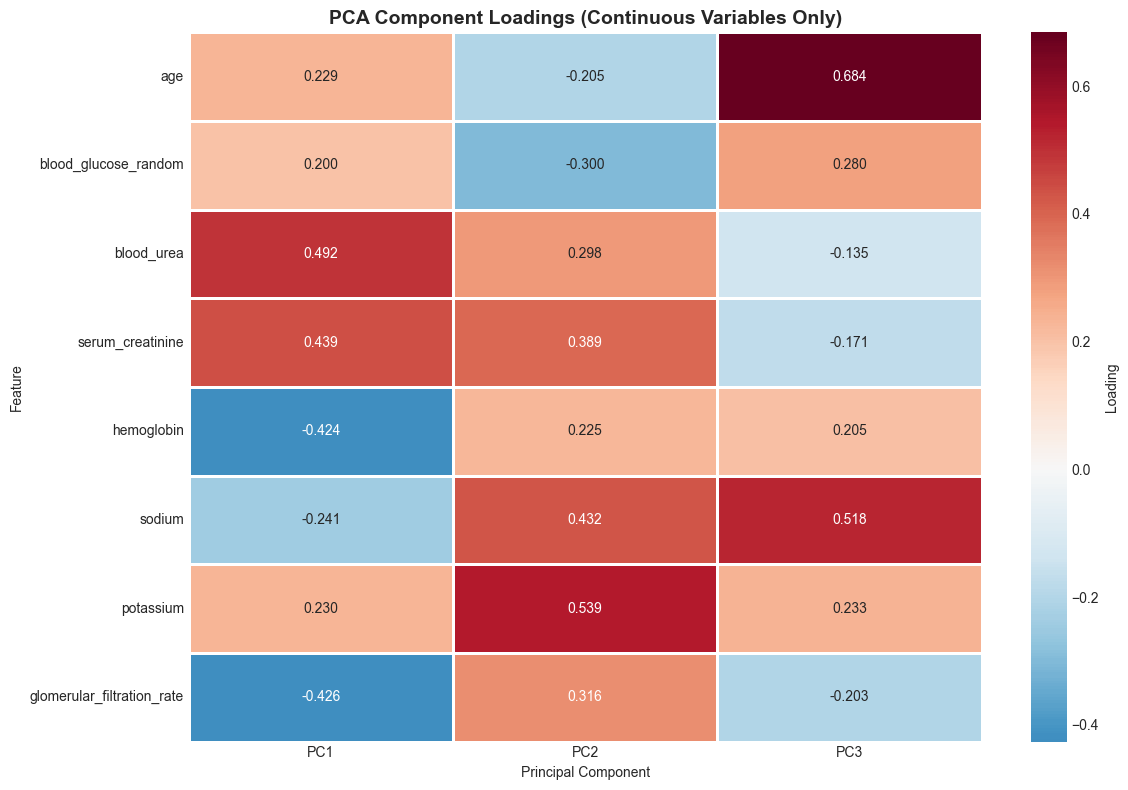


PCA Interpretation:
PC1 appears to capture: blood_urea, serum_creatinine, glomerular_filtration_rate
PC2 appears to capture: potassium, sodium, serum_creatinine
PC3 appears to capture: age, sodium, blood_glucose_random


Relationship between Principal Components and Categorical Variables:
------------------------------------------------------------
CKD patients average PC1 score: 0.854
Non-CKD patients average PC1 score: -1.506

Hypertension patients average PC1 score: 1.238
No hypertension patients average PC1 score: -0.798

Diabetes patients average PC1 score: 1.111
No diabetes patients average PC1 score: -0.589


In [81]:
plt.figure(figsize=(12, 8))

loadings = pd.DataFrame(
    pca.components_[:3].T,
    columns=['PC1', 'PC2', 'PC3'],
    index=[feat.replace('_numeric', '') for feat in continuous_features]
)

sns.heatmap(loadings, 
            annot=True, 
            fmt='.3f',
            cmap='RdBu_r',
            center=0,
            cbar_kws={'label': 'Loading'},
            linewidths=1)

plt.title('PCA Component Loadings (Continuous Variables Only)', fontsize=14, fontweight='bold')
plt.xlabel('Principal Component')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nPCA Interpretation:")
print("PC1 appears to capture:", end=" ")
top_pc1 = loadings['PC1'].abs().nlargest(3).index.tolist()
print(", ".join(top_pc1))

print("PC2 appears to capture:", end=" ")
top_pc2 = loadings['PC2'].abs().nlargest(3).index.tolist()
print(", ".join(top_pc2))

print("PC3 appears to capture:", end=" ")
top_pc3 = loadings['PC3'].abs().nlargest(3).index.tolist()
print(", ".join(top_pc3))

print("\n\nRelationship between Principal Components and Categorical Variables:")
print("-" * 60)

ckd_pc1_mean = X_pca[y_class == 'ckd', 0].mean()
notckd_pc1_mean = X_pca[y_class == 'notckd', 0].mean()
print(f"CKD patients average PC1 score: {ckd_pc1_mean:.3f}")
print(f"Non-CKD patients average PC1 score: {notckd_pc1_mean:.3f}")

htn_pc1_mean = X_pca[y_htn == 1, 0].mean()
no_htn_pc1_mean = X_pca[y_htn == 0, 0].mean()
print(f"\nHypertension patients average PC1 score: {htn_pc1_mean:.3f}")
print(f"No hypertension patients average PC1 score: {no_htn_pc1_mean:.3f}")

dm_pc1_mean = X_pca[y_dm == 1, 0].mean()
no_dm_pc1_mean = X_pca[y_dm == 0, 0].mean()
print(f"\nDiabetes patients average PC1 score: {dm_pc1_mean:.3f}")
print(f"No diabetes patients average PC1 score: {no_dm_pc1_mean:.3f}")

### 1.4 Linear Regression Analysis for CKD Dataset

In [82]:
regression_data = ckd_df_clean.copy()

continuous_predictors = ['age_numeric', 'blood_glucose_random_numeric', 'blood_urea_numeric',
                        'serum_creatinine_numeric', 'hemoglobin_numeric', 'sodium_numeric', 
                        'potassium_numeric']
target = 'glomerular_filtration_rate_numeric'

model1_data = regression_data[continuous_predictors + [target]].dropna()
X1 = model1_data[continuous_predictors]
y1 = model1_data[target]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

model1 = LinearRegression()
model1.fit(X1_train, y1_train)

y1_pred_train = model1.predict(X1_train)
y1_pred_test = model1.predict(X1_test)

r2_train1 = r2_score(y1_train, y1_pred_train)
r2_test1 = r2_score(y1_test, y1_pred_test)
mse_test1 = mean_squared_error(y1_test, y1_pred_test)

print("Model 1: Predicting GFR from Continuous Variables")
print(f"Features: {[feat.replace('_numeric', '') for feat in continuous_predictors]}")
print(f"R² (train): {r2_train1:.4f}")
print(f"R² (test): {r2_test1:.4f}")
print(f"MSE (test): {mse_test1:.2f}")
print(f"RMSE (test): {np.sqrt(mse_test1):.2f}")
print(f"Correlation (test): {np.corrcoef(y1_test, y1_pred_test)[0,1]:.4f}")

print("\nFeature Coefficients:")
for feat, coef in zip(continuous_predictors, model1.coef_):
    print(f"  {feat.replace('_numeric', '')}: {coef:.4f}")

Model 1: Predicting GFR from Continuous Variables
Features: ['age', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'hemoglobin', 'sodium', 'potassium']
R² (train): 0.5294
R² (test): 0.3739
MSE (test): 1975.99
RMSE (test): 44.45
Correlation (test): 0.6746

Feature Coefficients:
  age: -1.2137
  blood_glucose_random: -0.0931
  blood_urea: -0.4374
  serum_creatinine: 6.7190
  hemoglobin: 6.5094
  sodium: 1.3181
  potassium: -3.3345


In [68]:
continuous_predictors_2 = ['age_numeric', 'blood_glucose_random_numeric', 'blood_urea_numeric',
                          'hemoglobin_numeric', 'sodium_numeric', 'potassium_numeric',
                          'glomerular_filtration_rate_numeric']
target2 = 'serum_creatinine_numeric'

model2_data = regression_data[continuous_predictors_2 + [target2]].dropna()
X2 = model2_data[continuous_predictors_2]
y2 = model2_data[target2]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)

y2_pred_train = model2.predict(X2_train)
y2_pred_test = model2.predict(X2_test)

r2_train2 = r2_score(y2_train, y2_pred_train)
r2_test2 = r2_score(y2_test, y2_pred_test)
mse_test2 = mean_squared_error(y2_test, y2_pred_test)

print("\nModel 2: Predicting Serum Creatinine from Continuous Variables")
print(f"Features: {[feat.replace('_numeric', '') for feat in continuous_predictors_2]}")
print(f"R² (train): {r2_train2:.4f}")
print(f"R² (test): {r2_test2:.4f}")
print(f"MSE (test): {mse_test2:.4f}")
print(f"RMSE (test): {np.sqrt(mse_test2):.4f}")
print(f"Correlation (test): {np.corrcoef(y2_test, y2_pred_test)[0,1]:.4f}")

print("\nFeature Coefficients:")
for feat, coef in zip(continuous_predictors_2, model2.coef_):
    print(f"  {feat.replace('_numeric', '')}: {coef:.4f}")


Model 2: Predicting Serum Creatinine from Continuous Variables
Features: ['age', 'blood_glucose_random', 'blood_urea', 'hemoglobin', 'sodium', 'potassium', 'glomerular_filtration_rate']
R² (train): 0.8851
R² (test): -0.7062
MSE (test): 11.5552
RMSE (test): 3.3993
Correlation (test): 0.4813

Feature Coefficients:
  age: 0.0027
  blood_glucose_random: 0.0008
  blood_urea: 0.0428
  hemoglobin: 0.0083
  sodium: -0.0806
  potassium: 0.5054
  glomerular_filtration_rate: 0.0060


In [83]:
continuous_predictors_3 = ['age_numeric', 'blood_glucose_random_numeric', 'blood_urea_numeric',
                          'serum_creatinine_numeric', 'sodium_numeric', 'potassium_numeric',
                          'glomerular_filtration_rate_numeric']
target3 = 'hemoglobin_numeric'

model3_data = regression_data[continuous_predictors_3 + [target3]].dropna()
X3 = model3_data[continuous_predictors_3]
y3 = model3_data[target3]

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

model3 = LinearRegression()
model3.fit(X3_train, y3_train)

y3_pred_train = model3.predict(X3_train)
y3_pred_test = model3.predict(X3_test)

r2_train3 = r2_score(y3_train, y3_pred_train)
r2_test3 = r2_score(y3_test, y3_pred_test)
mse_test3 = mean_squared_error(y3_test, y3_pred_test)

print("\nModel 3: Predicting Hemoglobin from Continuous Variables")
print(f"Features: {[feat.replace('_numeric', '') for feat in continuous_predictors_3]}")
print(f"R² (train): {r2_train3:.4f}")
print(f"R² (test): {r2_test3:.4f}")
print(f"MSE (test): {mse_test3:.4f}")
print(f"RMSE (test): {np.sqrt(mse_test3):.4f}")
print(f"Correlation (test): {np.corrcoef(y3_test, y3_pred_test)[0,1]:.4f}")

print("\nFeature Coefficients:")
for feat, coef in zip(continuous_predictors_3, model3.coef_):
    print(f"  {feat.replace('_numeric', '')}: {coef:.4f}")


Model 3: Predicting Hemoglobin from Continuous Variables
Features: ['age', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'glomerular_filtration_rate']
R² (train): 0.4305
R² (test): 0.4463
MSE (test): 5.7217
RMSE (test): 2.3920
Correlation (test): 0.6787

Feature Coefficients:
  age: 0.0167
  blood_glucose_random: -0.0035
  blood_urea: -0.0178
  serum_creatinine: 0.0303
  sodium: 0.0699
  potassium: 0.0767
  glomerular_filtration_rate: 0.0212


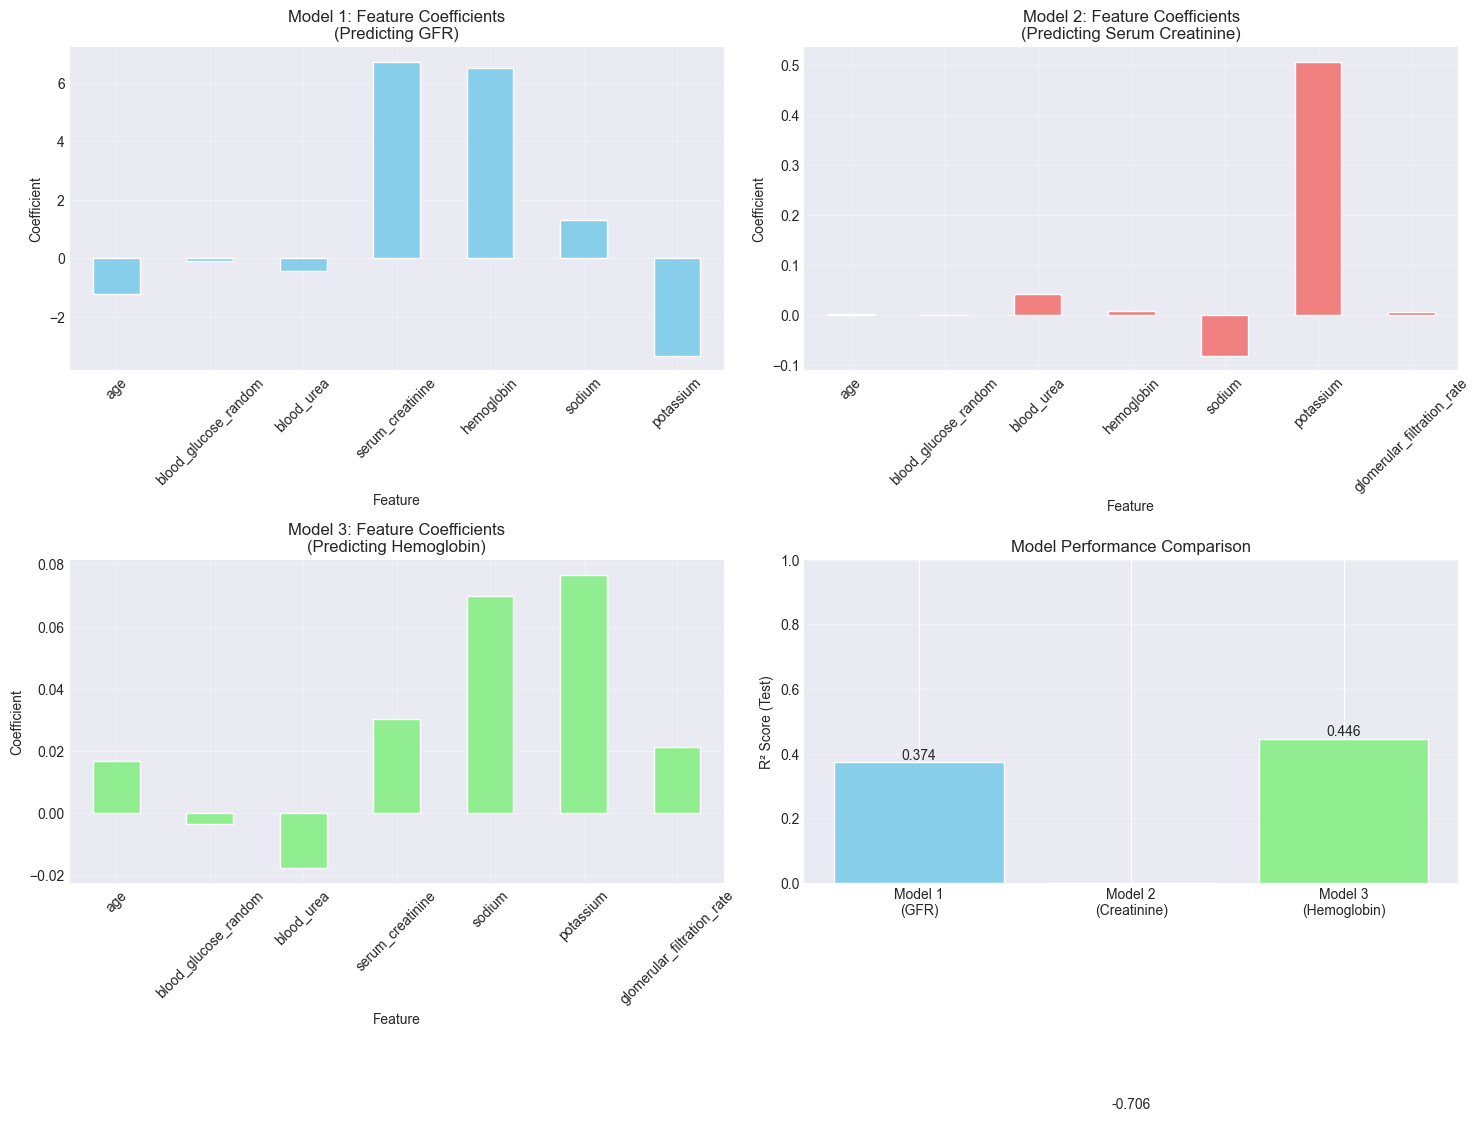


Linear Regression Model Comparison Summary (Continuous Variables Only)
Model                               R² (test)       RMSE (test)    
------------------------------------------------------------
Model 1 (GFR prediction)            0.3739          44.45          
Model 2 (Creatinine prediction)     -0.7062         3.3993         
Model 3 (Hemoglobin prediction)     0.4463          2.3920         


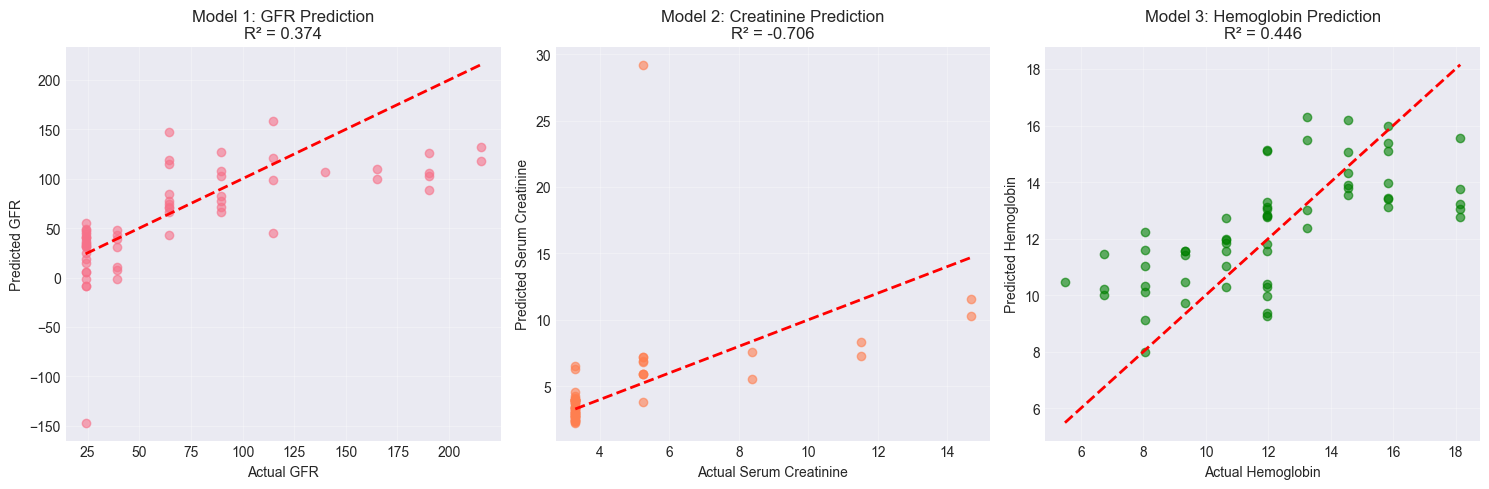

In [84]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

ax1 = axes[0, 0]
coef1 = pd.Series(model1.coef_, index=[feat.replace('_numeric', '') for feat in continuous_predictors])
coef1.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Model 1: Feature Coefficients\n(Predicting GFR)')
ax1.set_xlabel('Feature')
ax1.set_ylabel('Coefficient')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

ax2 = axes[0, 1]
coef2 = pd.Series(model2.coef_, index=[feat.replace('_numeric', '') for feat in continuous_predictors_2])
coef2.plot(kind='bar', ax=ax2, color='lightcoral')
ax2.set_title('Model 2: Feature Coefficients\n(Predicting Serum Creatinine)')
ax2.set_xlabel('Feature')
ax2.set_ylabel('Coefficient')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

ax3 = axes[1, 0]
coef3 = pd.Series(model3.coef_, index=[feat.replace('_numeric', '') for feat in continuous_predictors_3])
coef3.plot(kind='bar', ax=ax3, color='lightgreen')
ax3.set_title('Model 3: Feature Coefficients\n(Predicting Hemoglobin)')
ax3.set_xlabel('Feature')
ax3.set_ylabel('Coefficient')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3)

ax4 = axes[1, 1]
models = ['Model 1\n(GFR)', 'Model 2\n(Creatinine)', 'Model 3\n(Hemoglobin)']
r2_scores = [r2_test1, r2_test2, r2_test3]
bars = ax4.bar(models, r2_scores, color=['skyblue', 'lightcoral', 'lightgreen'])
ax4.set_ylabel('R² Score (Test)')
ax4.set_title('Model Performance Comparison')
ax4.set_ylim(0, 1)
ax4.grid(True, alpha=0.3, axis='y')

for bar, score in zip(bars, r2_scores):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{score:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("Linear Regression Model Comparison Summary (Continuous Variables Only)")
print("="*60)
print(f"{'Model':<35} {'R² (test)':<15} {'RMSE (test)':<15}")
print("-"*60)
print(f"{'Model 1 (GFR prediction)':<35} {r2_test1:<15.4f} {np.sqrt(mse_test1):<15.2f}")
print(f"{'Model 2 (Creatinine prediction)':<35} {r2_test2:<15.4f} {np.sqrt(mse_test2):<15.4f}")
print(f"{'Model 3 (Hemoglobin prediction)':<35} {r2_test3:<15.4f} {np.sqrt(mse_test3):<15.4f}")
print("="*60)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(y1_test, y1_pred_test, alpha=0.6)
axes[0].plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual GFR')
axes[0].set_ylabel('Predicted GFR')
axes[0].set_title(f'Model 1: GFR Prediction\nR² = {r2_test1:.3f}')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(y2_test, y2_pred_test, alpha=0.6, color='coral')
axes[1].plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Serum Creatinine')
axes[1].set_ylabel('Predicted Serum Creatinine')
axes[1].set_title(f'Model 2: Creatinine Prediction\nR² = {r2_test2:.3f}')
axes[1].grid(True, alpha=0.3)

axes[2].scatter(y3_test, y3_pred_test, alpha=0.6, color='green')
axes[2].plot([y3_test.min(), y3_test.max()], [y3_test.min(), y3_test.max()], 'r--', lw=2)
axes[2].set_xlabel('Actual Hemoglobin')
axes[2].set_ylabel('Predicted Hemoglobin')
axes[2].set_title(f'Model 3: Hemoglobin Prediction\nR² = {r2_test3:.3f}')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Part 2: Diabetic Nephropathy Analysis

### 2.1 Heatmaps for Diabetic Nephropathy Dataset

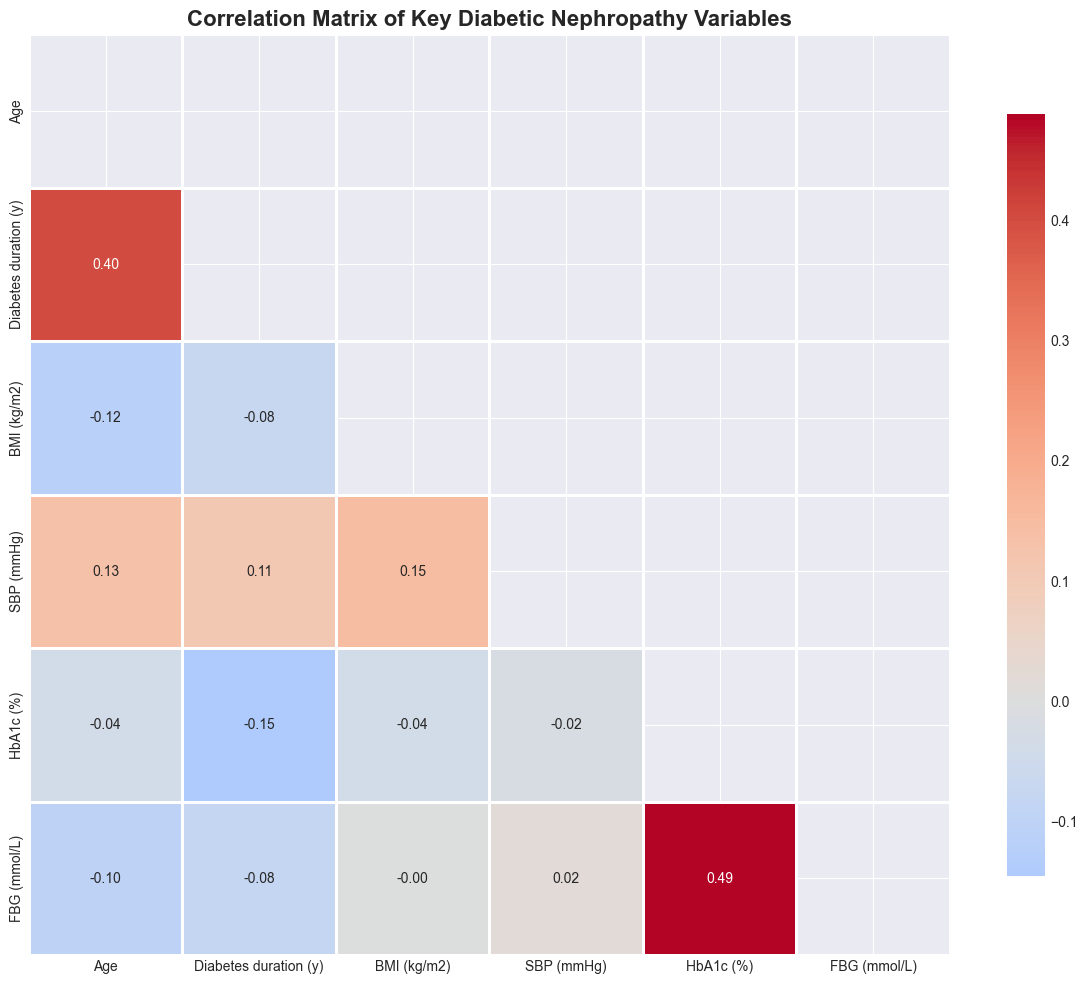

In [20]:
# Clean column names for diabetic nephropathy dataset
dn_df.columns = dn_df.columns.str.strip()

# Heatmap 1: Correlation matrix of key numerical variables
key_dn_vars = ['Age', 'Diabetes duration (y)', 'BMI (kg/m2)', 'SBP (mmHg)', 
               'HbA1c (%)', 'FBG (mmol/L)', 'Serum Creatinine(mg/dl)', 
               'eGFR(ml/min/1.73m2)']

# Filter out columns that exist
existing_dn_vars = [col for col in key_dn_vars if col in dn_df.columns]

# If some columns don't exist, try alternative names
if 'Serum Creatinine(mg/dl)' not in dn_df.columns:
    # Look for alternative column names
    creatinine_cols = [col for col in dn_df.columns if 'creatinine' in col.lower()]
    egfr_cols = [col for col in dn_df.columns if 'gfr' in col.lower() or 'egfr' in col.lower()]
    
    # Update the list with actual column names
    existing_dn_vars = ['Age', 'Diabetes duration (y)', 'BMI (kg/m2)', 'SBP (mmHg)', 
                        'HbA1c (%)', 'FBG (mmol/L)']
    existing_dn_vars = [col for col in existing_dn_vars if col in dn_df.columns]

plt.figure(figsize=(12, 10))
correlation_matrix_dn = dn_df[existing_dn_vars].corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(correlation_matrix_dn, dtype=bool))

sns.heatmap(correlation_matrix_dn, 
            mask=mask,
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": .8})

plt.title('Correlation Matrix of Key Diabetic Nephropathy Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

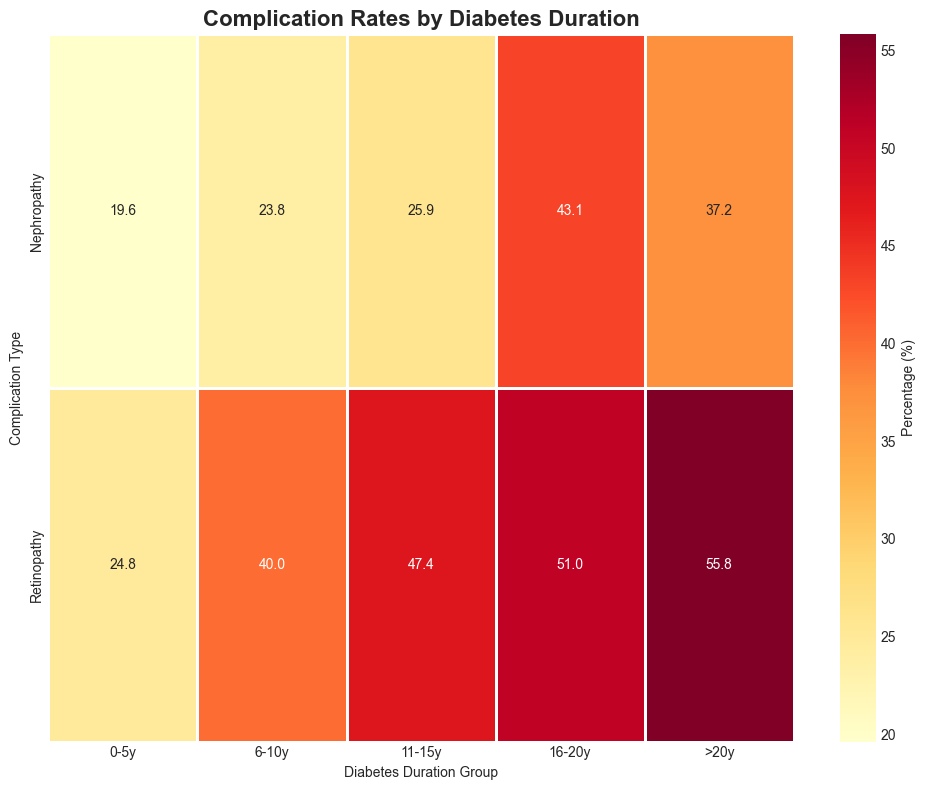

In [21]:
# Heatmap 2: Complications by diabetes duration groups
# Create duration groups
dn_df['duration_group'] = pd.cut(dn_df['Diabetes duration (y)'], 
                                  bins=[0, 5, 10, 15, 20, 100],
                                  labels=['0-5y', '6-10y', '11-15y', '16-20y', '>20y'])

# Calculate complication rates
complications_by_duration = []
for group in ['0-5y', '6-10y', '11-15y', '16-20y', '>20y']:
    group_data = dn_df[dn_df['duration_group'] == group]
    if len(group_data) > 0:
        complications_by_duration.append({
            'Duration': group,
            'Nephropathy': group_data['Diabetic nephropathy (DN)'].mean() * 100,
            'Retinopathy': group_data['Diabetic retinopathy (DR)'].mean() * 100,
            'Count': len(group_data)
        })

comp_duration_df = pd.DataFrame(complications_by_duration)
pivot_comp_duration = comp_duration_df.set_index('Duration')[['Nephropathy', 'Retinopathy']]

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_comp_duration.T, 
            annot=True, 
            fmt='.1f',
            cmap='YlOrRd',
            cbar_kws={'label': 'Percentage (%)'},
            linewidths=1)

plt.title('Complication Rates by Diabetes Duration', fontsize=16, fontweight='bold')
plt.xlabel('Diabetes Duration Group')
plt.ylabel('Complication Type')
plt.tight_layout()
plt.show()

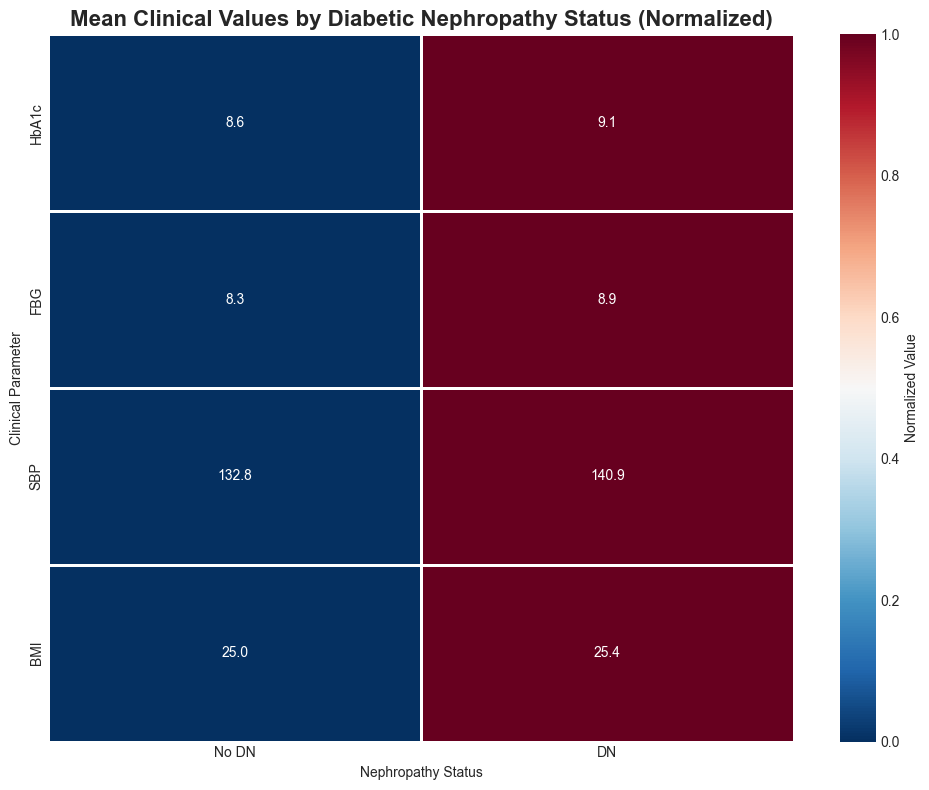

In [22]:
# Heatmap 3: Lab values by nephropathy status
lab_values_by_dn = []
for status in [0, 1]:
    status_data = dn_df[dn_df['Diabetic nephropathy (DN)'] == status]
    if len(status_data) > 0:
        lab_values_by_dn.append({
            'DN_Status': 'DN' if status == 1 else 'No DN',
            'HbA1c': status_data['HbA1c (%)'].mean(),
            'FBG': status_data['FBG (mmol/L)'].mean(),
            'SBP': status_data['SBP (mmHg)'].mean(),
            'BMI': status_data['BMI (kg/m2)'].mean()
        })

lab_dn_df = pd.DataFrame(lab_values_by_dn)
pivot_lab_dn = lab_dn_df.set_index('DN_Status').T

# Normalize the values for better visualization
pivot_lab_dn_normalized = (pivot_lab_dn - pivot_lab_dn.min(axis=1).values.reshape(-1,1)) / (pivot_lab_dn.max(axis=1).values.reshape(-1,1) - pivot_lab_dn.min(axis=1).values.reshape(-1,1))

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_lab_dn_normalized,
            annot=pivot_lab_dn.round(1),
            fmt='.1f',
            cmap='RdBu_r',
            cbar_kws={'label': 'Normalized Value'},
            linewidths=1)

plt.title('Mean Clinical Values by Diabetic Nephropathy Status (Normalized)', fontsize=16, fontweight='bold')
plt.xlabel('Nephropathy Status')
plt.ylabel('Clinical Parameter')
plt.tight_layout()
plt.show()

### 2.2 Bubble Plots for Diabetic Nephropathy Dataset

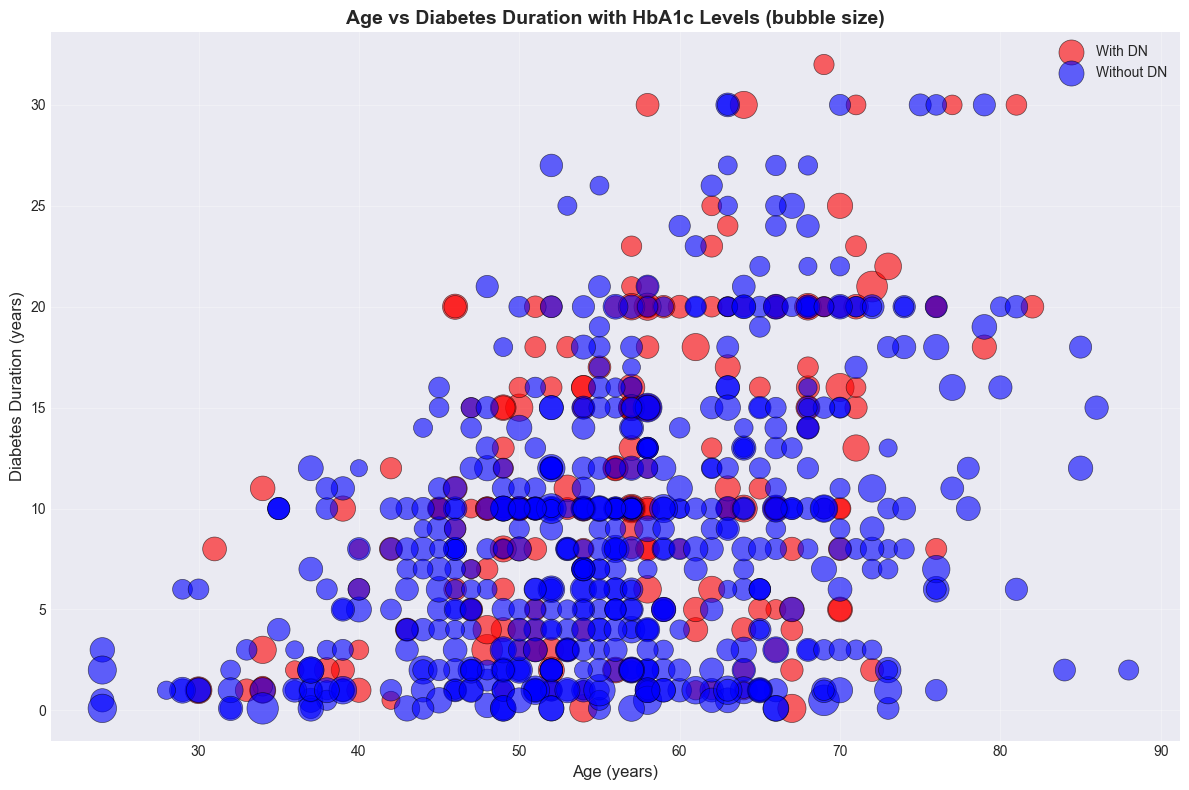

In [23]:
# Bubble Plot 1: Age vs Diabetes Duration with bubble size = HbA1c
fig, ax = plt.subplots(figsize=(12, 8))

# Remove missing values
bubble_data = dn_df[['Age', 'Diabetes duration (y)', 'HbA1c (%)', 
                     'Diabetic nephropathy (DN)']].dropna()

# Separate by nephropathy status
dn_yes = bubble_data[bubble_data['Diabetic nephropathy (DN)'] == 1]
dn_no = bubble_data[bubble_data['Diabetic nephropathy (DN)'] == 0]

# Create bubble plot
scatter1 = ax.scatter(dn_yes['Age'], 
                     dn_yes['Diabetes duration (y)'],
                     s=dn_yes['HbA1c (%)'] * 30,
                     alpha=0.6,
                     c='red',
                     edgecolors='black',
                     linewidth=0.5,
                     label='With DN')

scatter2 = ax.scatter(dn_no['Age'], 
                     dn_no['Diabetes duration (y)'],
                     s=dn_no['HbA1c (%)'] * 30,
                     alpha=0.6,
                     c='blue',
                     edgecolors='black',
                     linewidth=0.5,
                     label='Without DN')

ax.set_xlabel('Age (years)', fontsize=12)
ax.set_ylabel('Diabetes Duration (years)', fontsize=12)
ax.set_title('Age vs Diabetes Duration with HbA1c Levels (bubble size)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

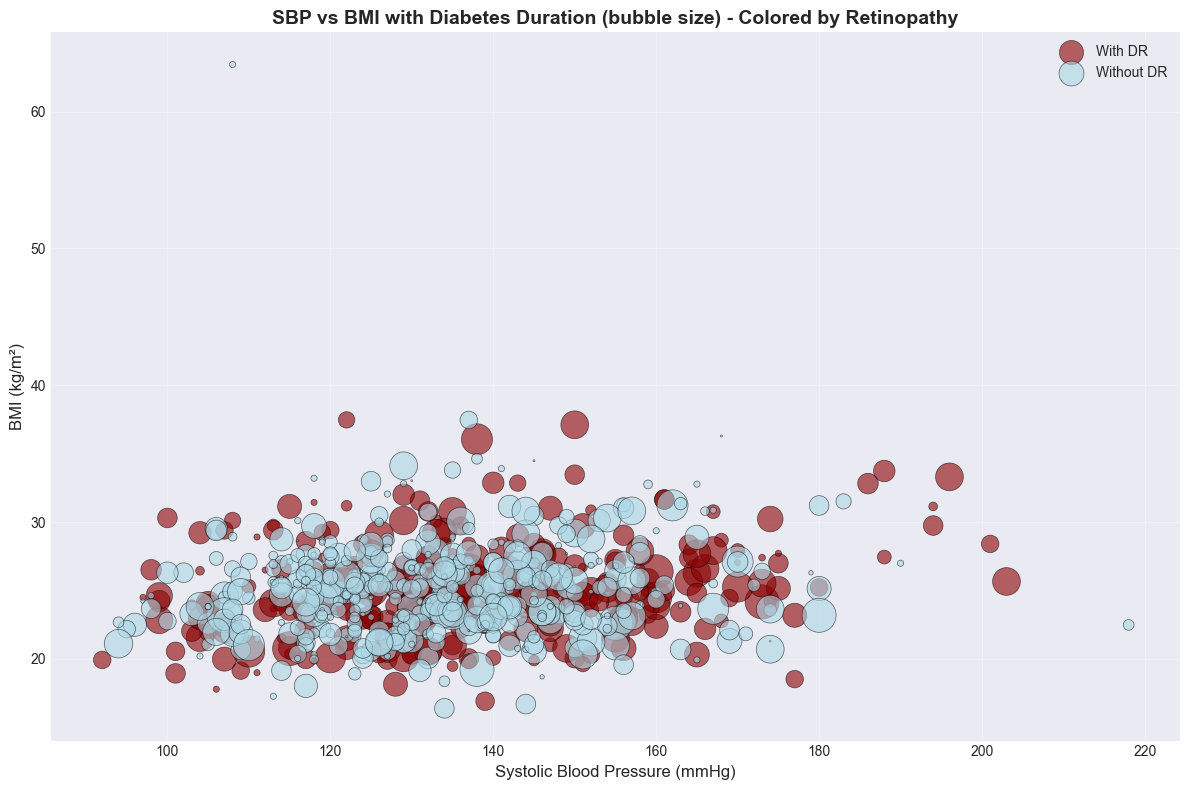

In [24]:
# Bubble Plot 2: SBP vs BMI with bubble size = Diabetes Duration
fig, ax = plt.subplots(figsize=(12, 8))

# Remove missing values
bubble_data2 = dn_df[['SBP (mmHg)', 'BMI (kg/m2)', 'Diabetes duration (y)', 
                      'Diabetic retinopathy (DR)']].dropna()

# Separate by retinopathy status
dr_yes = bubble_data2[bubble_data2['Diabetic retinopathy (DR)'] == 1]
dr_no = bubble_data2[bubble_data2['Diabetic retinopathy (DR)'] == 0]

# Create bubble plot
scatter1 = ax.scatter(dr_yes['SBP (mmHg)'], 
                     dr_yes['BMI (kg/m2)'],
                     s=dr_yes['Diabetes duration (y)'] * 20,
                     alpha=0.6,
                     c='darkred',
                     edgecolors='black',
                     linewidth=0.5,
                     label='With DR')

scatter2 = ax.scatter(dr_no['SBP (mmHg)'], 
                     dr_no['BMI (kg/m2)'],
                     s=dr_no['Diabetes duration (y)'] * 20,
                     alpha=0.6,
                     c='lightblue',
                     edgecolors='black',
                     linewidth=0.5,
                     label='Without DR')

ax.set_xlabel('Systolic Blood Pressure (mmHg)', fontsize=12)
ax.set_ylabel('BMI (kg/m²)', fontsize=12)
ax.set_title('SBP vs BMI with Diabetes Duration (bubble size) - Colored by Retinopathy', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

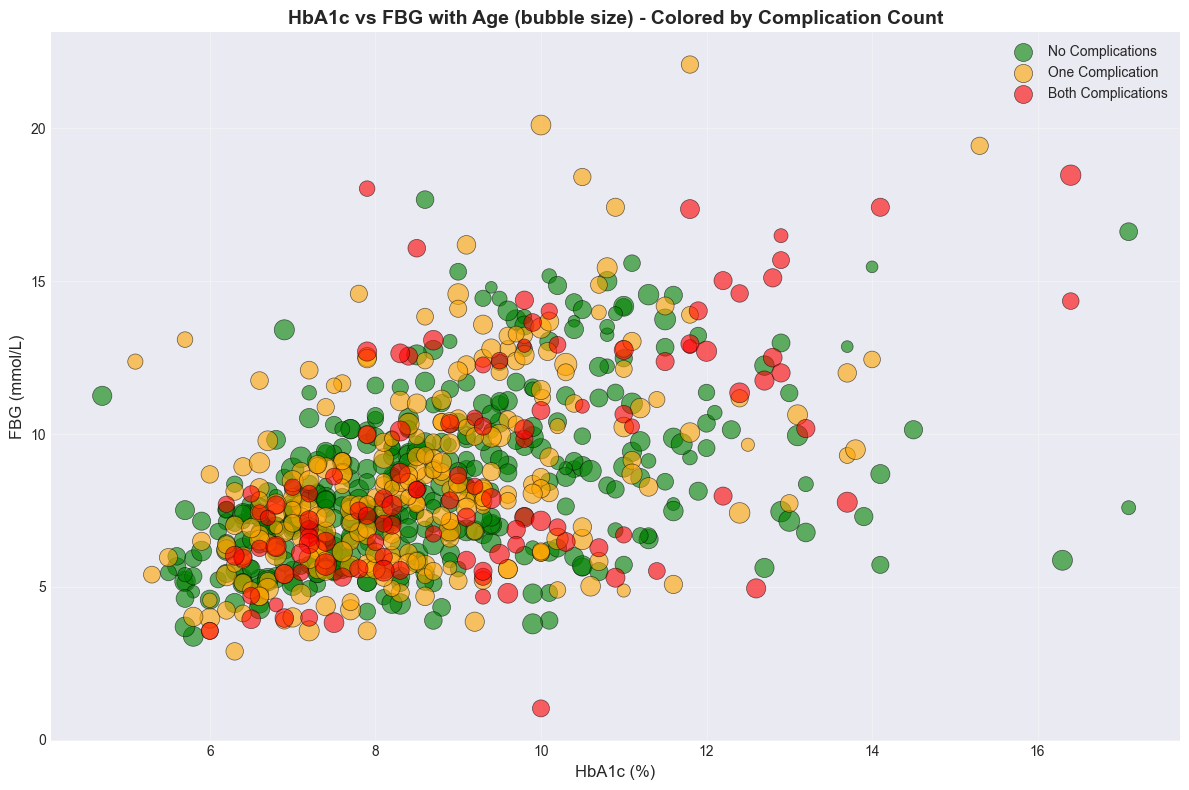

In [25]:
# Bubble Plot 3: HbA1c vs FBG with bubble size = Age
fig, ax = plt.subplots(figsize=(12, 8))

# Remove missing values
bubble_data3 = dn_df[['HbA1c (%)', 'FBG (mmol/L)', 'Age', 
                      'Diabetic nephropathy (DN)', 'Diabetic retinopathy (DR)']].dropna()

# Create combined complication status
bubble_data3['complications'] = bubble_data3['Diabetic nephropathy (DN)'] + bubble_data3['Diabetic retinopathy (DR)']

# Separate by complication status
no_comp = bubble_data3[bubble_data3['complications'] == 0]
one_comp = bubble_data3[bubble_data3['complications'] == 1]
both_comp = bubble_data3[bubble_data3['complications'] == 2]

# Create bubble plot
scatter1 = ax.scatter(no_comp['HbA1c (%)'], 
                     no_comp['FBG (mmol/L)'],
                     s=no_comp['Age'] * 3,
                     alpha=0.6,
                     c='green',
                     edgecolors='black',
                     linewidth=0.5,
                     label='No Complications')

scatter2 = ax.scatter(one_comp['HbA1c (%)'], 
                     one_comp['FBG (mmol/L)'],
                     s=one_comp['Age'] * 3,
                     alpha=0.6,
                     c='orange',
                     edgecolors='black',
                     linewidth=0.5,
                     label='One Complication')

scatter3 = ax.scatter(both_comp['HbA1c (%)'], 
                     both_comp['FBG (mmol/L)'],
                     s=both_comp['Age'] * 3,
                     alpha=0.6,
                     c='red',
                     edgecolors='black',
                     linewidth=0.5,
                     label='Both Complications')

ax.set_xlabel('HbA1c (%)', fontsize=12)
ax.set_ylabel('FBG (mmol/L)', fontsize=12)
ax.set_title('HbA1c vs FBG with Age (bubble size) - Colored by Complication Count', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 2.3 Principal Component Analysis (PCA) for Diabetic Nephropathy Dataset

In [26]:
# Prepare data for PCA
# Select numerical features
dn_pca_features = ['Age', 'Diabetes duration (y)', 'BMI (kg/m2)', 'SBP (mmHg)', 
                   'DBP (mmHg)', 'HbA1c (%)', 'FBG (mmol/L)']

# Create a clean dataset with no missing values
dn_pca_data = dn_df[dn_pca_features + ['Diabetic nephropathy (DN)']].dropna()

# Separate features and target
X_dn = dn_pca_data[dn_pca_features]
y_dn = dn_pca_data['Diabetic nephropathy (DN)']

# Standardize the features
scaler_dn = StandardScaler()
X_dn_scaled = scaler_dn.fit_transform(X_dn)

# Apply PCA
pca_dn = PCA()
X_dn_pca = pca_dn.fit_transform(X_dn_scaled)

# Print explained variance ratio
print("Explained variance ratio by component:")
for i, var in enumerate(pca_dn.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.4f} ({var*100:.2f}%)")

# Cumulative explained variance
cumsum_var_dn = np.cumsum(pca_dn.explained_variance_ratio_)
print(f"\nCumulative variance explained by first 3 components: {cumsum_var_dn[2]:.4f} ({cumsum_var_dn[2]*100:.2f}%)")

Explained variance ratio by component:
PC1: 0.2383 (23.83%)
PC2: 0.1880 (18.80%)
PC3: 0.1646 (16.46%)
PC4: 0.1457 (14.57%)
PC5: 0.1066 (10.66%)
PC6: 0.0895 (8.95%)
PC7: 0.0674 (6.74%)

Cumulative variance explained by first 3 components: 0.5909 (59.09%)


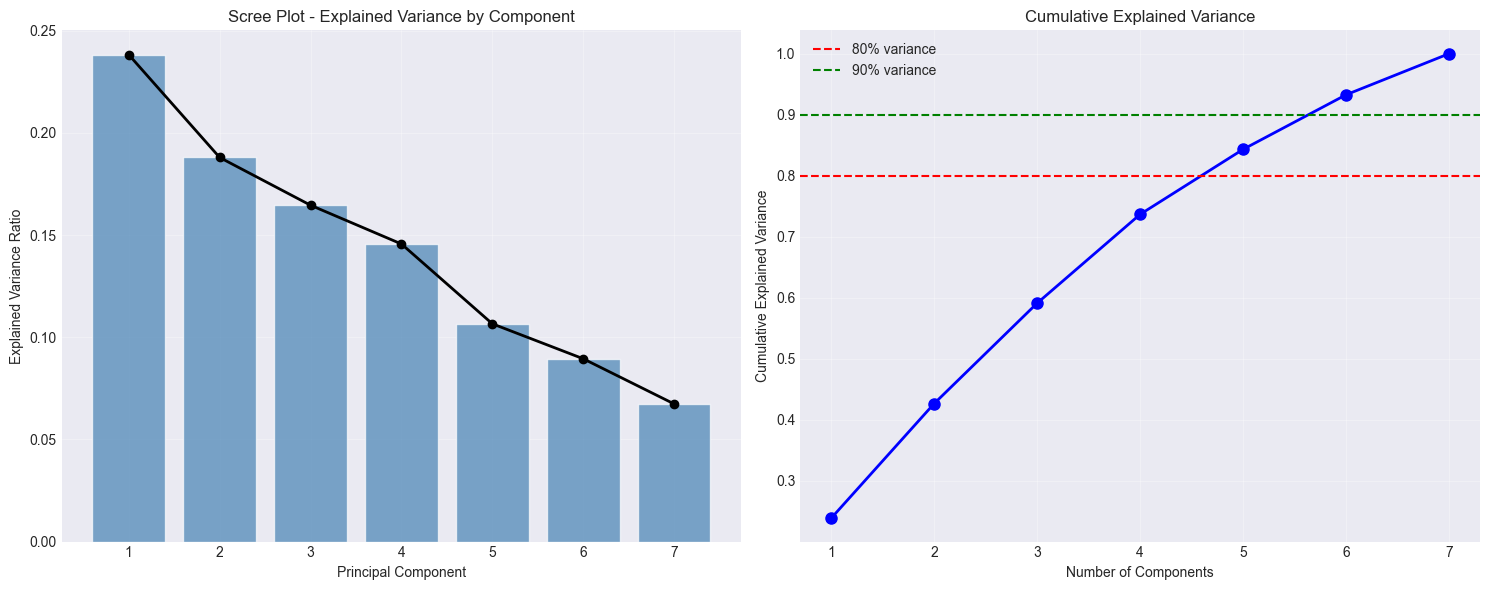

In [27]:
# Scree plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot explained variance ratio
ax1.bar(range(1, len(pca_dn.explained_variance_ratio_) + 1), 
        pca_dn.explained_variance_ratio_,
        alpha=0.7,
        color='steelblue')
ax1.plot(range(1, len(pca_dn.explained_variance_ratio_) + 1), 
         pca_dn.explained_variance_ratio_,
         'ko-',
         linewidth=2)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Scree Plot - Explained Variance by Component')
ax1.set_xticks(range(1, len(pca_dn.explained_variance_ratio_) + 1))
ax1.grid(True, alpha=0.3)

# Plot cumulative explained variance
ax2.plot(range(1, len(cumsum_var_dn) + 1), 
         cumsum_var_dn,
         'bo-',
         linewidth=2,
         markersize=8)
ax2.axhline(y=0.8, color='r', linestyle='--', label='80% variance')
ax2.axhline(y=0.9, color='g', linestyle='--', label='90% variance')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.set_title('Cumulative Explained Variance')
ax2.set_xticks(range(1, len(cumsum_var_dn) + 1))
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

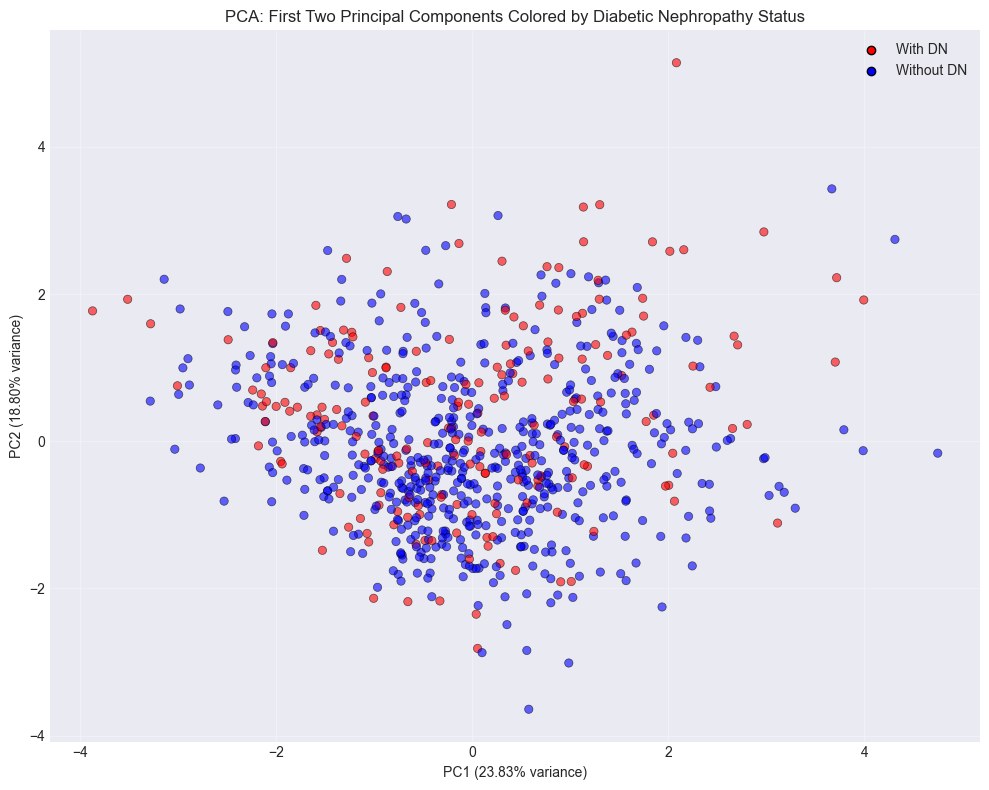

In [28]:
# PC1 vs PC2 scatter plot colored by DN status
plt.figure(figsize=(10, 8))

# Create color map
colors = ['red' if status == 1 else 'blue' for status in y_dn]

plt.scatter(X_dn_pca[:, 0], X_dn_pca[:, 1], 
           c=colors, 
           alpha=0.6,
           edgecolors='black',
           linewidth=0.5)

plt.xlabel(f'PC1 ({pca_dn.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca_dn.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA: First Two Principal Components Colored by Diabetic Nephropathy Status')

# Add legend
red_patch = plt.scatter([], [], c='red', label='With DN', edgecolors='black')
blue_patch = plt.scatter([], [], c='blue', label='Without DN', edgecolors='black')
plt.legend(handles=[red_patch, blue_patch])

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

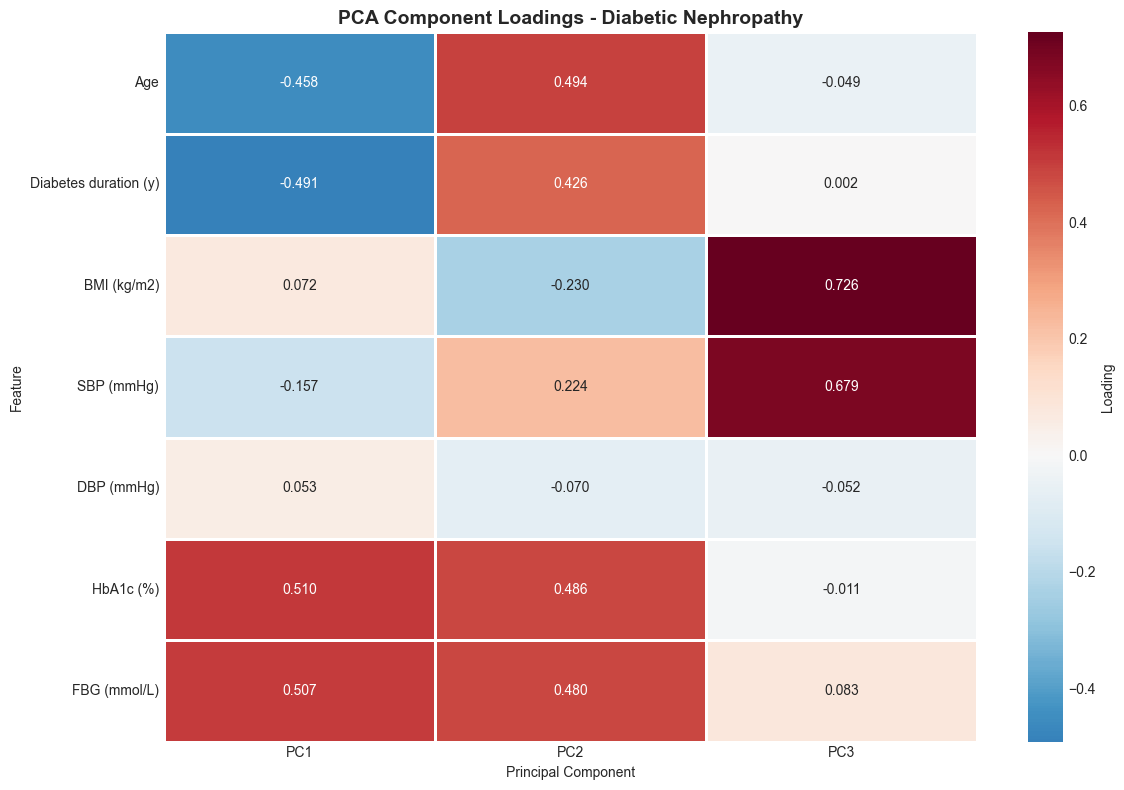


PCA Interpretation:
PC1 appears to capture: HbA1c (%), FBG (mmol/L), Diabetes duration (y)
PC2 appears to capture: Age, HbA1c (%), FBG (mmol/L)


In [29]:
# Component loadings
plt.figure(figsize=(12, 8))

# Create a dataframe of loadings
loadings_dn = pd.DataFrame(
    pca_dn.components_[:3].T,
    columns=['PC1', 'PC2', 'PC3'],
    index=dn_pca_features
)

# Heatmap of loadings
sns.heatmap(loadings_dn, 
            annot=True, 
            fmt='.3f',
            cmap='RdBu_r',
            center=0,
            cbar_kws={'label': 'Loading'},
            linewidths=1)

plt.title('PCA Component Loadings - Diabetic Nephropathy', fontsize=14, fontweight='bold')
plt.xlabel('Principal Component')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Print interpretation
print("\nPCA Interpretation:")
print("PC1 appears to capture:", end=" ")
top_pc1_dn = loadings_dn['PC1'].abs().nlargest(3).index.tolist()
print(", ".join(top_pc1_dn))

print("PC2 appears to capture:", end=" ")
top_pc2_dn = loadings_dn['PC2'].abs().nlargest(3).index.tolist()
print(", ".join(top_pc2_dn))

### 2.4 Linear Regression Analysis for Diabetic Nephropathy Dataset

In [30]:
# Model 1: Predict DN from diabetes duration and age
# Select features
basic_dn_features = ['Age', 'Diabetes duration (y)', 'BMI (kg/m2)']
target_dn = 'Diabetic nephropathy (DN)'

# Clean data
model1_dn_data = dn_df[basic_dn_features + [target_dn]].dropna()
X1_dn = model1_dn_data[basic_dn_features]
y1_dn = model1_dn_data[target_dn]

# Split data
X1_dn_train, X1_dn_test, y1_dn_train, y1_dn_test = train_test_split(X1_dn, y1_dn, test_size=0.3, random_state=42)

# Train model
model1_dn = LinearRegression()
model1_dn.fit(X1_dn_train, y1_dn_train)

# Predictions
y1_dn_pred_train = model1_dn.predict(X1_dn_train)
y1_dn_pred_test = model1_dn.predict(X1_dn_test)

# Evaluate
r2_train1_dn = r2_score(y1_dn_train, y1_dn_pred_train)
r2_test1_dn = r2_score(y1_dn_test, y1_dn_pred_test)
mse_test1_dn = mean_squared_error(y1_dn_test, y1_dn_pred_test)

print("Model 1: Predicting DN from Demographics")
print(f"Features: {basic_dn_features}")
print(f"R² (train): {r2_train1_dn:.4f}")
print(f"R² (test): {r2_test1_dn:.4f}")
print(f"MSE (test): {mse_test1_dn:.4f}")
print(f"Correlation (test): {np.corrcoef(y1_dn_test, y1_dn_pred_test)[0,1]:.4f}")

Model 1: Predicting DN from Demographics
Features: ['Age', 'Diabetes duration (y)', 'BMI (kg/m2)']
R² (train): 0.0694
R² (test): -0.0697
MSE (test): 0.1970
Correlation (test): 0.0133


In [31]:
# Model 2: Predict DN from glycemic control measures
glycemic_features = ['HbA1c (%)', 'FBG (mmol/L)', 'SBP (mmHg)']

# Clean data
model2_dn_data = dn_df[glycemic_features + [target_dn]].dropna()
X2_dn = model2_dn_data[glycemic_features]
y2_dn = model2_dn_data[target_dn]

# Split data
X2_dn_train, X2_dn_test, y2_dn_train, y2_dn_test = train_test_split(X2_dn, y2_dn, test_size=0.3, random_state=42)

# Train model
model2_dn = LinearRegression()
model2_dn.fit(X2_dn_train, y2_dn_train)

# Predictions
y2_dn_pred_train = model2_dn.predict(X2_dn_train)
y2_dn_pred_test = model2_dn.predict(X2_dn_test)

# Evaluate
r2_train2_dn = r2_score(y2_dn_train, y2_dn_pred_train)
r2_test2_dn = r2_score(y2_dn_test, y2_dn_pred_test)
mse_test2_dn = mean_squared_error(y2_dn_test, y2_dn_pred_test)

print("\nModel 2: Predicting DN from Glycemic Control")
print(f"Features: {glycemic_features}")
print(f"R² (train): {r2_train2_dn:.4f}")
print(f"R² (test): {r2_test2_dn:.4f}")
print(f"MSE (test): {mse_test2_dn:.4f}")
print(f"Correlation (test): {np.corrcoef(y2_dn_test, y2_dn_pred_test)[0,1]:.4f}")


Model 2: Predicting DN from Glycemic Control
Features: ['HbA1c (%)', 'FBG (mmol/L)', 'SBP (mmHg)']
R² (train): 0.0502
R² (test): 0.0541
MSE (test): 0.1747
Correlation (test): 0.2396


In [32]:
# Model 3: Using PCA components as predictors
# Use first 3 principal components to predict DN status
X_dn_pca_df = pd.DataFrame(X_dn_pca[:, :3], columns=['PC1', 'PC2', 'PC3'])

# Split data
X3_dn_train, X3_dn_test, y3_dn_train, y3_dn_test = train_test_split(X_dn_pca_df, y_dn, test_size=0.3, random_state=42)

# Train model
model3_dn = LinearRegression()
model3_dn.fit(X3_dn_train, y3_dn_train)

# Predictions
y3_dn_pred_train = model3_dn.predict(X3_dn_train)
y3_dn_pred_test = model3_dn.predict(X3_dn_test)

# Evaluate
r2_train3_dn = r2_score(y3_dn_train, y3_dn_pred_train)
r2_test3_dn = r2_score(y3_dn_test, y3_dn_pred_test)
mse_test3_dn = mean_squared_error(y3_dn_test, y3_dn_pred_test)

print("\nModel 3: Predicting DN from PCA Components")
print(f"Features: First 3 principal components")
print(f"R² (train): {r2_train3_dn:.4f}")
print(f"R² (test): {r2_test3_dn:.4f}")
print(f"MSE (test): {mse_test3_dn:.4f}")
print(f"Correlation (test): {np.corrcoef(y3_dn_test, y3_dn_pred_test)[0,1]:.4f}")


Model 3: Predicting DN from PCA Components
Features: First 3 principal components
R² (train): 0.0809
R² (test): 0.0203
MSE (test): 0.1874
Correlation (test): 0.1728


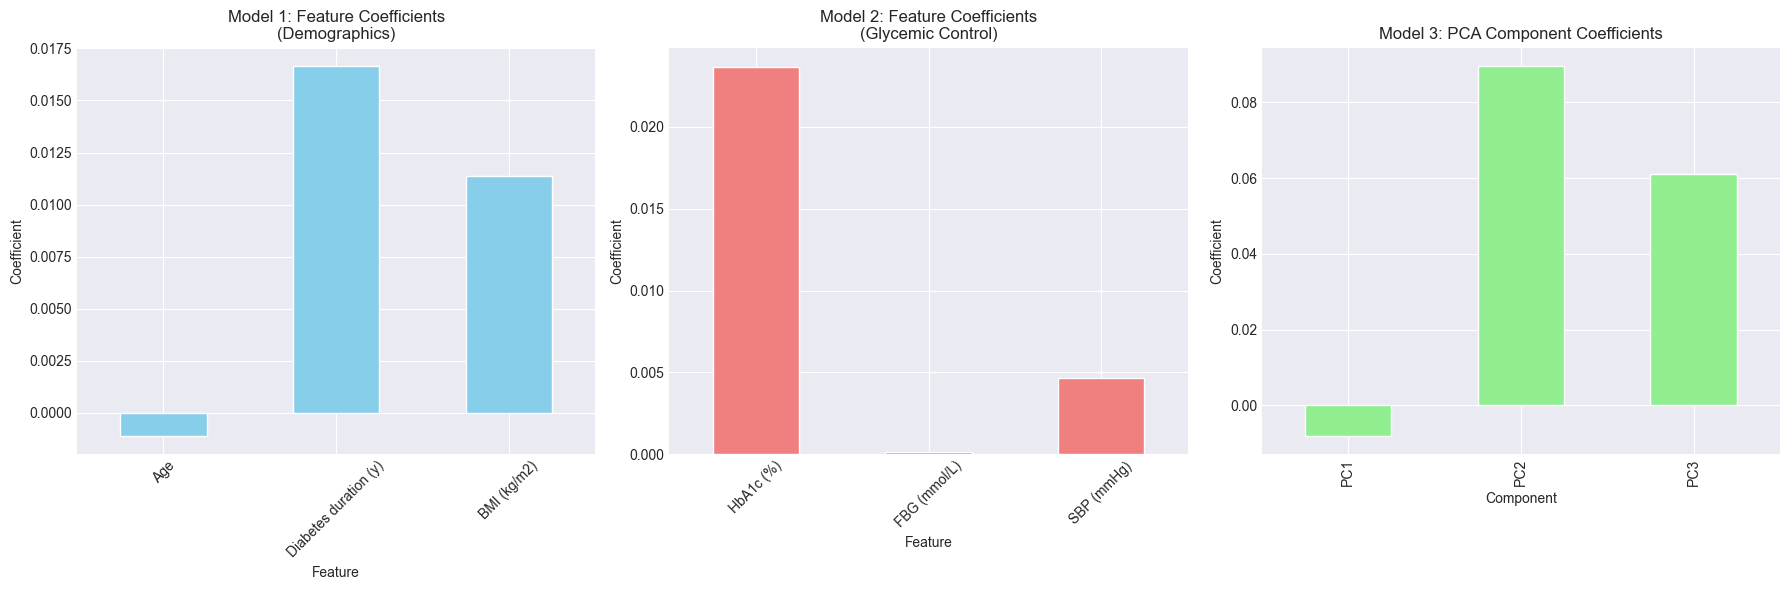


Linear Regression Model Comparison Summary - Diabetic Nephropathy
Model                          R² (test)       Best Features
------------------------------------------------------------
Model 1 (Demographics)         -0.0697         Age, Duration, BMI
Model 2 (Glycemic)             0.0541          HbA1c, FBG, SBP
Model 3 (PCA)                  0.0203          PC1, PC2, PC3


In [33]:
# Feature importance comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Model 1 coefficients
ax1 = axes[0]
coef1_dn = pd.Series(model1_dn.coef_, index=basic_dn_features)
coef1_dn.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Model 1: Feature Coefficients\n(Demographics)')
ax1.set_xlabel('Feature')
ax1.set_ylabel('Coefficient')
ax1.tick_params(axis='x', rotation=45)

# Model 2 coefficients
ax2 = axes[1]
coef2_dn = pd.Series(model2_dn.coef_, index=glycemic_features)
coef2_dn.plot(kind='bar', ax=ax2, color='lightcoral')
ax2.set_title('Model 2: Feature Coefficients\n(Glycemic Control)')
ax2.set_xlabel('Feature')
ax2.set_ylabel('Coefficient')
ax2.tick_params(axis='x', rotation=45)

# Model 3 coefficients
ax3 = axes[2]
coef3_dn = pd.Series(model3_dn.coef_, index=['PC1', 'PC2', 'PC3'])
coef3_dn.plot(kind='bar', ax=ax3, color='lightgreen')
ax3.set_title('Model 3: PCA Component Coefficients')
ax3.set_xlabel('Component')
ax3.set_ylabel('Coefficient')

plt.tight_layout()
plt.show()

# Summary comparison
print("\n" + "="*60)
print("Linear Regression Model Comparison Summary - Diabetic Nephropathy")
print("="*60)
print(f"{'Model':<30} {'R² (test)':<15} {'Best Features'}")
print("-"*60)
print(f"{'Model 1 (Demographics)':<30} {r2_test1_dn:<15.4f} Age, Duration, BMI")
print(f"{'Model 2 (Glycemic)':<30} {r2_test2_dn:<15.4f} HbA1c, FBG, SBP")
print(f"{'Model 3 (PCA)':<30} {r2_test3_dn:<15.4f} PC1, PC2, PC3")
print("="*60)

## Part 3: Acute Kidney Injury (AKI) Analysis

### 3.1 Heatmaps for AKI Dataset

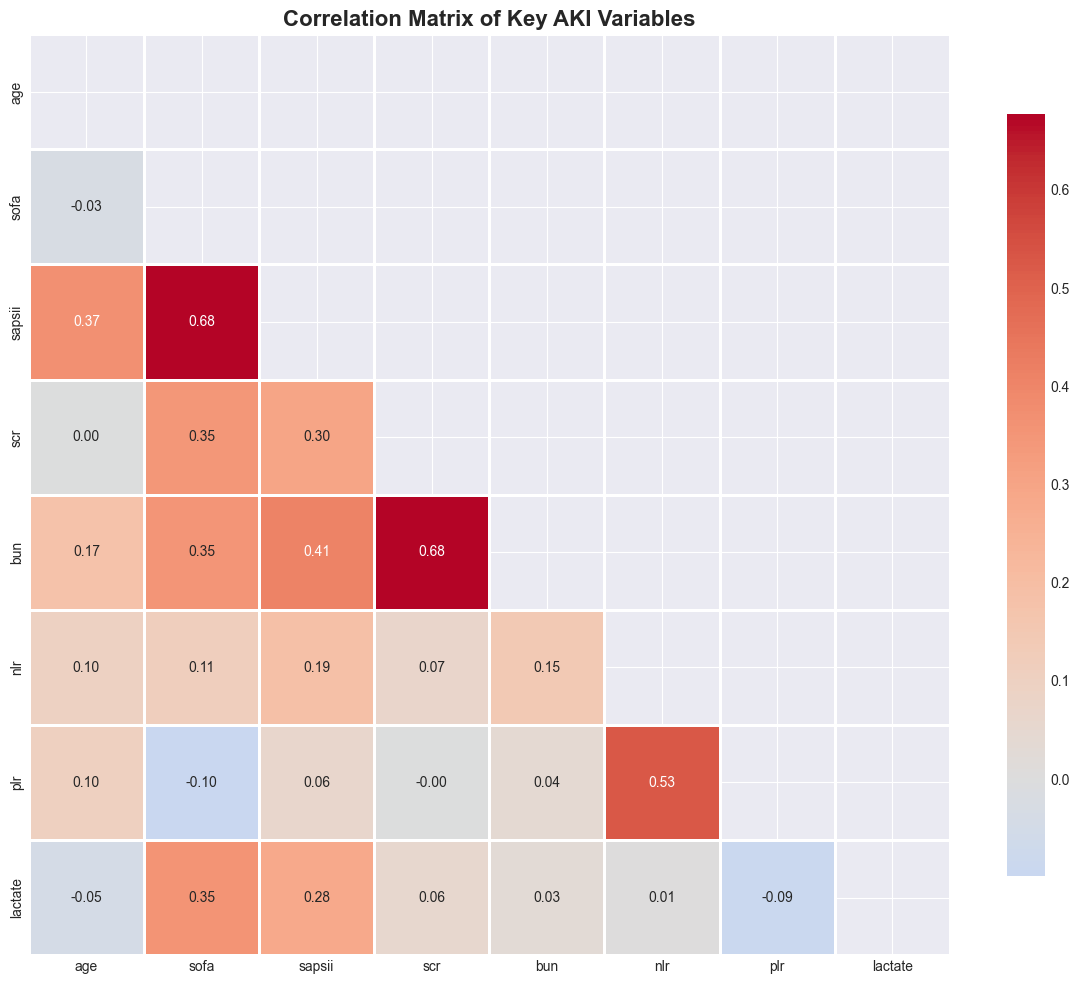

In [34]:
# Heatmap 1: Correlation matrix of key numerical variables
key_aki_vars = ['age', 'sofa', 'sapsii', 'scr', 'bun', 'nlr', 'plr', 'lactate']

# Filter out columns that exist and have data
existing_aki_vars = [col for col in key_aki_vars if col in aki_df.columns]

plt.figure(figsize=(12, 10))
correlation_matrix_aki = aki_df[existing_aki_vars].corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(correlation_matrix_aki, dtype=bool))

sns.heatmap(correlation_matrix_aki, 
            mask=mask,
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": .8})

plt.title('Correlation Matrix of Key AKI Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

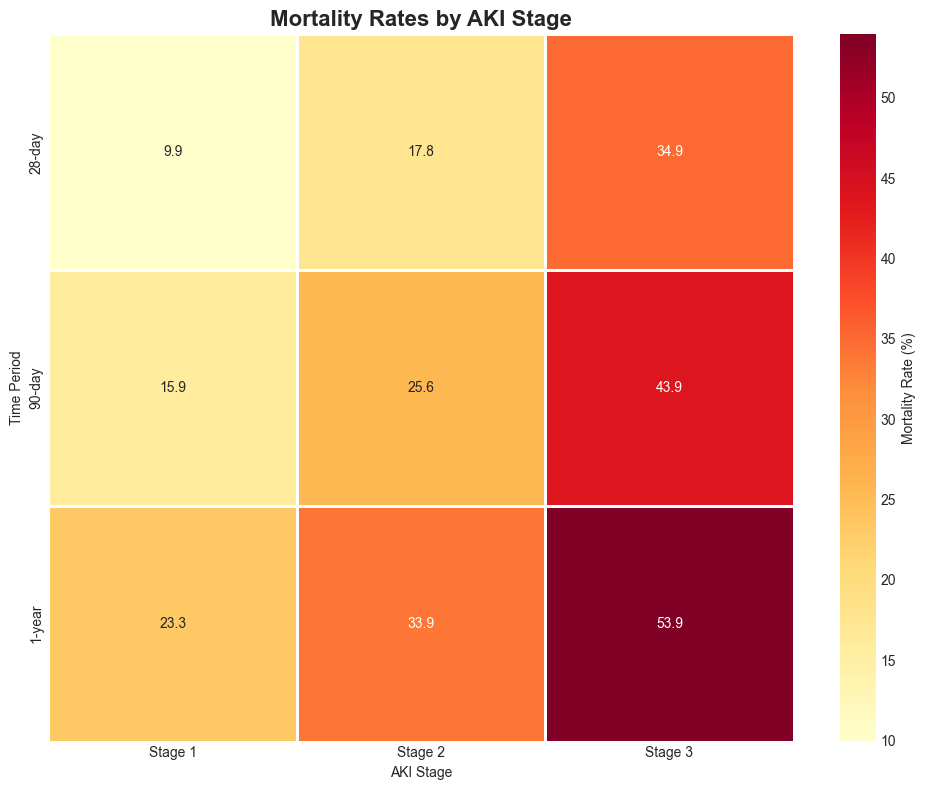

In [35]:
# Heatmap 2: Mortality rates by AKI stage
mortality_by_stage = []
for stage in [1, 2, 3]:
    stage_data = aki_df[aki_df['aki_stage'] == stage]
    if len(stage_data) > 0:
        mortality_by_stage.append({
            'Stage': f'Stage {stage}',
            '28-day': stage_data['mort_28_day'].mean() * 100,
            '90-day': stage_data['mort_90_day'].mean() * 100,
            '1-year': stage_data['mort_1_year'].mean() * 100,
            'Count': len(stage_data)
        })

mortality_df = pd.DataFrame(mortality_by_stage)
pivot_mortality = mortality_df.set_index('Stage')[['28-day', '90-day', '1-year']]

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_mortality.T, 
            annot=True, 
            fmt='.1f',
            cmap='YlOrRd',
            cbar_kws={'label': 'Mortality Rate (%)'},
            linewidths=1)

plt.title('Mortality Rates by AKI Stage', fontsize=16, fontweight='bold')
plt.xlabel('AKI Stage')
plt.ylabel('Time Period')
plt.tight_layout()
plt.show()

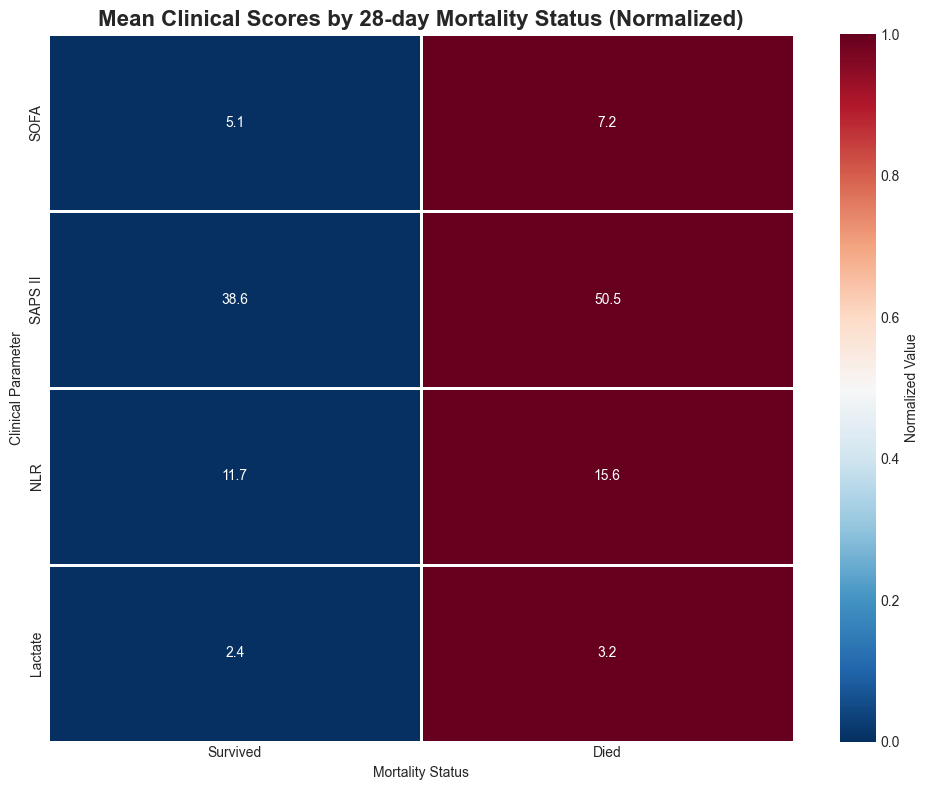

In [36]:
# Heatmap 3: Clinical scores by mortality status
clinical_by_mortality = []
for status in [0, 1]:
    mort_data = aki_df[aki_df['mort_28_day'] == status]
    if len(mort_data) > 0:
        clinical_by_mortality.append({
            'Status': 'Died' if status == 1 else 'Survived',
            'SOFA': mort_data['sofa'].mean(),
            'SAPS II': mort_data['sapsii'].mean(),
            'NLR': mort_data['nlr'].mean(),
            'Lactate': mort_data['lactate'].mean()
        })

clinical_mort_df = pd.DataFrame(clinical_by_mortality)
pivot_clinical = clinical_mort_df.set_index('Status').T

# Normalize the values for better visualization
pivot_clinical_normalized = (pivot_clinical - pivot_clinical.min(axis=1).values.reshape(-1,1)) / (pivot_clinical.max(axis=1).values.reshape(-1,1) - pivot_clinical.min(axis=1).values.reshape(-1,1))

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_clinical_normalized,
            annot=pivot_clinical.round(1),
            fmt='.1f',
            cmap='RdBu_r',
            cbar_kws={'label': 'Normalized Value'},
            linewidths=1)

plt.title('Mean Clinical Scores by 28-day Mortality Status (Normalized)', fontsize=16, fontweight='bold')
plt.xlabel('Mortality Status')
plt.ylabel('Clinical Parameter')
plt.tight_layout()
plt.show()

### 3.2 Bubble Plots for AKI Dataset

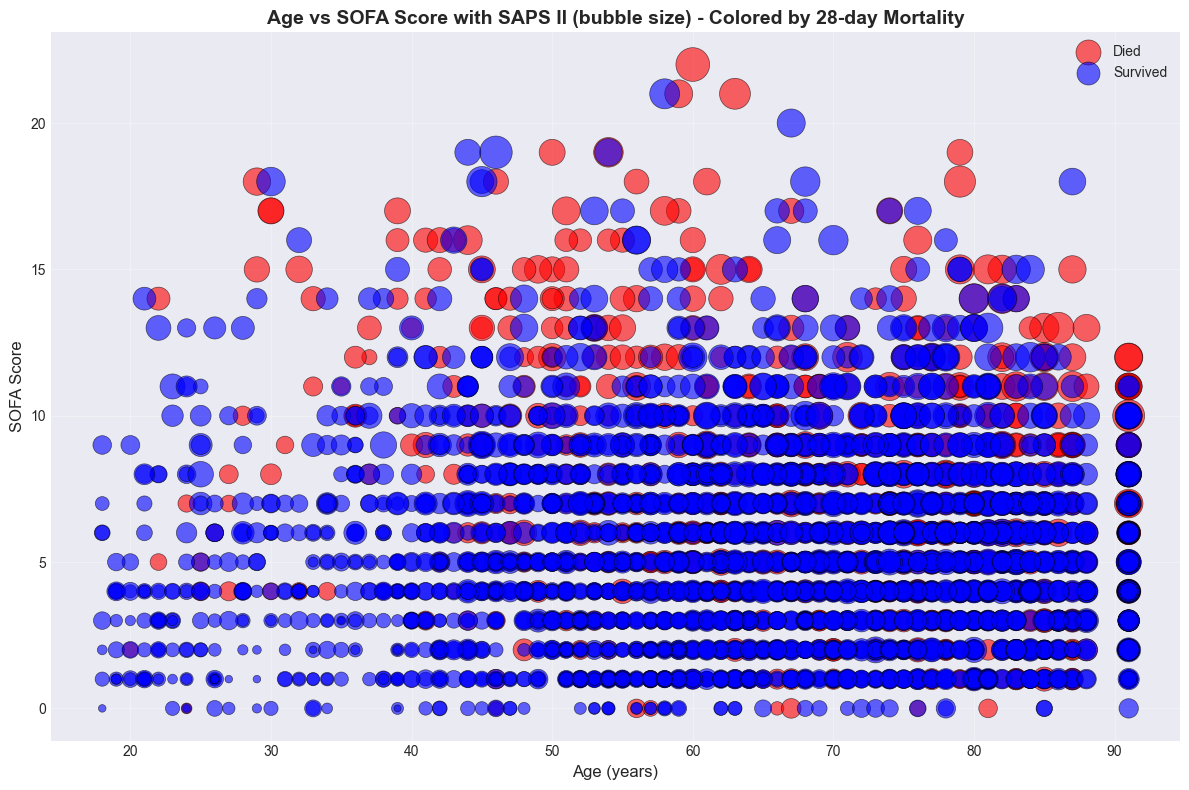

In [37]:
# Bubble Plot 1: Age vs SOFA score with bubble size = SAPS II
fig, ax = plt.subplots(figsize=(12, 8))

# Remove missing values
bubble_data = aki_df[['age', 'sofa', 'sapsii', 'mort_28_day']].dropna()

# Separate by mortality status
died = bubble_data[bubble_data['mort_28_day'] == 1]
survived = bubble_data[bubble_data['mort_28_day'] == 0]

# Create bubble plot
scatter1 = ax.scatter(died['age'], 
                     died['sofa'],
                     s=died['sapsii'] * 5,
                     alpha=0.6,
                     c='red',
                     edgecolors='black',
                     linewidth=0.5,
                     label='Died')

scatter2 = ax.scatter(survived['age'], 
                     survived['sofa'],
                     s=survived['sapsii'] * 5,
                     alpha=0.6,
                     c='blue',
                     edgecolors='black',
                     linewidth=0.5,
                     label='Survived')

ax.set_xlabel('Age (years)', fontsize=12)
ax.set_ylabel('SOFA Score', fontsize=12)
ax.set_title('Age vs SOFA Score with SAPS II (bubble size) - Colored by 28-day Mortality', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

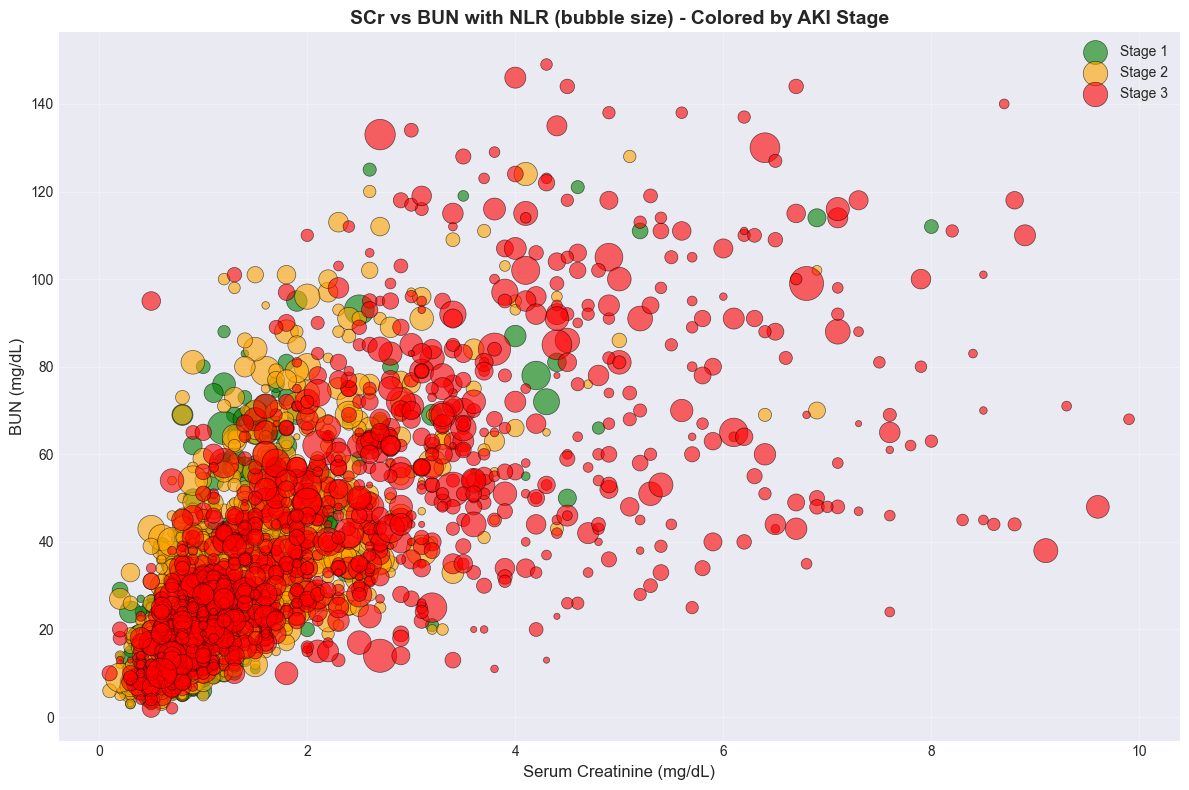

In [38]:
# Bubble Plot 2: Serum Creatinine vs BUN with bubble size = NLR
fig, ax = plt.subplots(figsize=(12, 8))

# Remove missing values and limit extreme values
bubble_data2 = aki_df[['scr', 'bun', 'nlr', 'aki_stage']].dropna()
bubble_data2 = bubble_data2[bubble_data2['scr'] < 10]  # Limit extreme values
bubble_data2 = bubble_data2[bubble_data2['bun'] < 150]

# Separate by AKI stage
stage1 = bubble_data2[bubble_data2['aki_stage'] == 1]
stage2 = bubble_data2[bubble_data2['aki_stage'] == 2]
stage3 = bubble_data2[bubble_data2['aki_stage'] == 3]

# Create bubble plot
scatter1 = ax.scatter(stage1['scr'], 
                     stage1['bun'],
                     s=stage1['nlr'] * 10,
                     alpha=0.6,
                     c='green',
                     edgecolors='black',
                     linewidth=0.5,
                     label='Stage 1')

scatter2 = ax.scatter(stage2['scr'], 
                     stage2['bun'],
                     s=stage2['nlr'] * 10,
                     alpha=0.6,
                     c='orange',
                     edgecolors='black',
                     linewidth=0.5,
                     label='Stage 2')

scatter3 = ax.scatter(stage3['scr'], 
                     stage3['bun'],
                     s=stage3['nlr'] * 10,
                     alpha=0.6,
                     c='red',
                     edgecolors='black',
                     linewidth=0.5,
                     label='Stage 3')

ax.set_xlabel('Serum Creatinine (mg/dL)', fontsize=12)
ax.set_ylabel('BUN (mg/dL)', fontsize=12)
ax.set_title('SCr vs BUN with NLR (bubble size) - Colored by AKI Stage', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

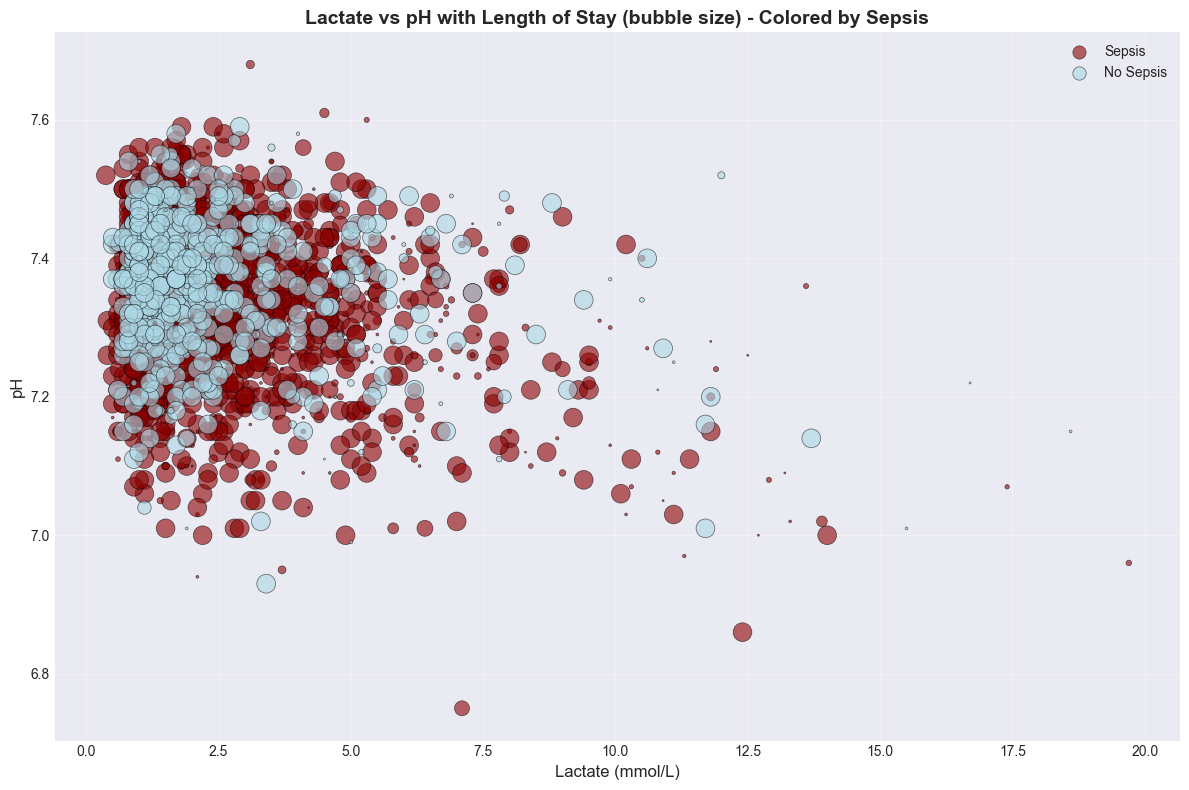

In [39]:
# Bubble Plot 3: Lactate vs pH with bubble size = Length of Stay
fig, ax = plt.subplots(figsize=(12, 8))

# Remove missing values
bubble_data3 = aki_df[['lactate', 'ph', 'cox_los', 'sepsis']].dropna()

# Separate by sepsis status
sepsis_yes = bubble_data3[bubble_data3['sepsis'] == 1]
sepsis_no = bubble_data3[bubble_data3['sepsis'] == 0]

# Create bubble plot
scatter1 = ax.scatter(sepsis_yes['lactate'], 
                     sepsis_yes['ph'],
                     s=sepsis_yes['cox_los'] * 2,
                     alpha=0.6,
                     c='darkred',
                     edgecolors='black',
                     linewidth=0.5,
                     label='Sepsis')

scatter2 = ax.scatter(sepsis_no['lactate'], 
                     sepsis_no['ph'],
                     s=sepsis_no['cox_los'] * 2,
                     alpha=0.6,
                     c='lightblue',
                     edgecolors='black',
                     linewidth=0.5,
                     label='No Sepsis')

ax.set_xlabel('Lactate (mmol/L)', fontsize=12)
ax.set_ylabel('pH', fontsize=12)
ax.set_title('Lactate vs pH with Length of Stay (bubble size) - Colored by Sepsis', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.3 Principal Component Analysis (PCA) for AKI Dataset

In [40]:
# Prepare data for PCA
# Select numerical features
aki_pca_features = ['age', 'sofa', 'sapsii', 'scr', 'bun', 'nlr', 'plr', 'hb']

# Create a clean dataset with no missing values
aki_pca_data = aki_df[aki_pca_features + ['mort_28_day']].dropna()

# Separate features and target
X_aki = aki_pca_data[aki_pca_features]
y_aki = aki_pca_data['mort_28_day']

# Standardize the features
scaler_aki = StandardScaler()
X_aki_scaled = scaler_aki.fit_transform(X_aki)

# Apply PCA
pca_aki = PCA()
X_aki_pca = pca_aki.fit_transform(X_aki_scaled)

# Print explained variance ratio
print("Explained variance ratio by component:")
for i, var in enumerate(pca_aki.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.4f} ({var*100:.2f}%)")

# Cumulative explained variance
cumsum_var_aki = np.cumsum(pca_aki.explained_variance_ratio_)
print(f"\nCumulative variance explained by first 3 components: {cumsum_var_aki[2]:.4f} ({cumsum_var_aki[2]*100:.2f}%)")

Explained variance ratio by component:
PC1: 0.3171 (31.71%)
PC2: 0.1921 (19.21%)
PC3: 0.1396 (13.96%)
PC4: 0.1262 (12.62%)
PC5: 0.1061 (10.61%)
PC6: 0.0560 (5.60%)
PC7: 0.0372 (3.72%)
PC8: 0.0257 (2.57%)

Cumulative variance explained by first 3 components: 0.6488 (64.88%)


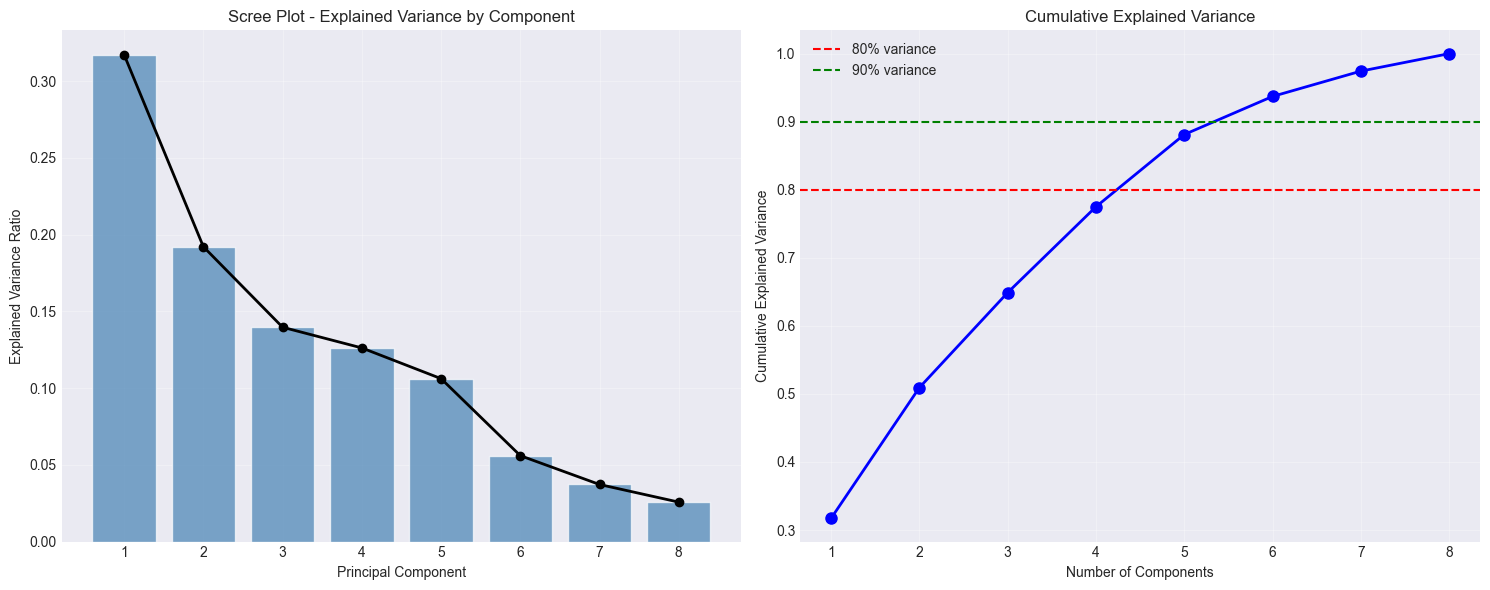

In [41]:
# Scree plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot explained variance ratio
ax1.bar(range(1, len(pca_aki.explained_variance_ratio_) + 1), 
        pca_aki.explained_variance_ratio_,
        alpha=0.7,
        color='steelblue')
ax1.plot(range(1, len(pca_aki.explained_variance_ratio_) + 1), 
         pca_aki.explained_variance_ratio_,
         'ko-',
         linewidth=2)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Scree Plot - Explained Variance by Component')
ax1.set_xticks(range(1, len(pca_aki.explained_variance_ratio_) + 1))
ax1.grid(True, alpha=0.3)

# Plot cumulative explained variance
ax2.plot(range(1, len(cumsum_var_aki) + 1), 
         cumsum_var_aki,
         'bo-',
         linewidth=2,
         markersize=8)
ax2.axhline(y=0.8, color='r', linestyle='--', label='80% variance')
ax2.axhline(y=0.9, color='g', linestyle='--', label='90% variance')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.set_title('Cumulative Explained Variance')
ax2.set_xticks(range(1, len(cumsum_var_aki) + 1))
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

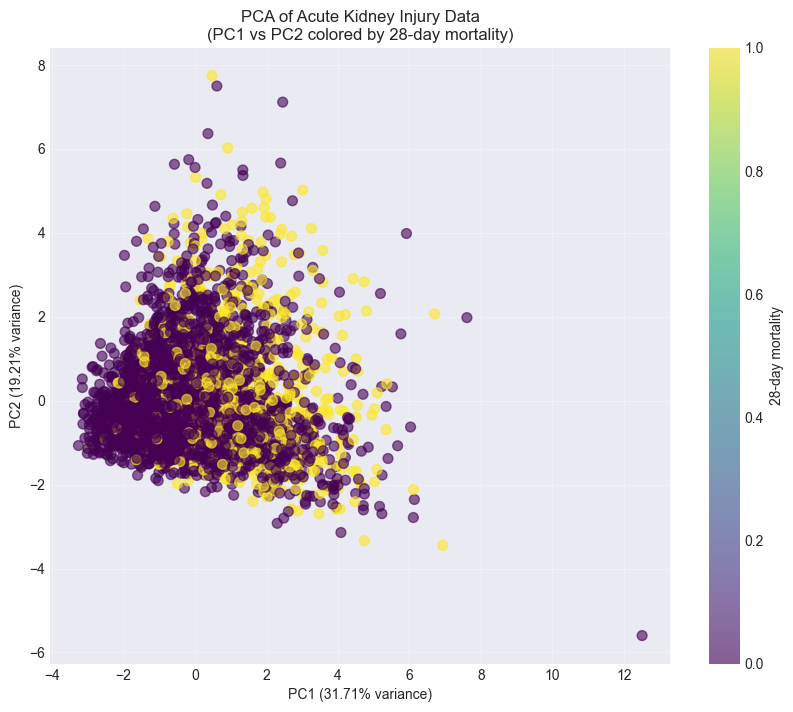

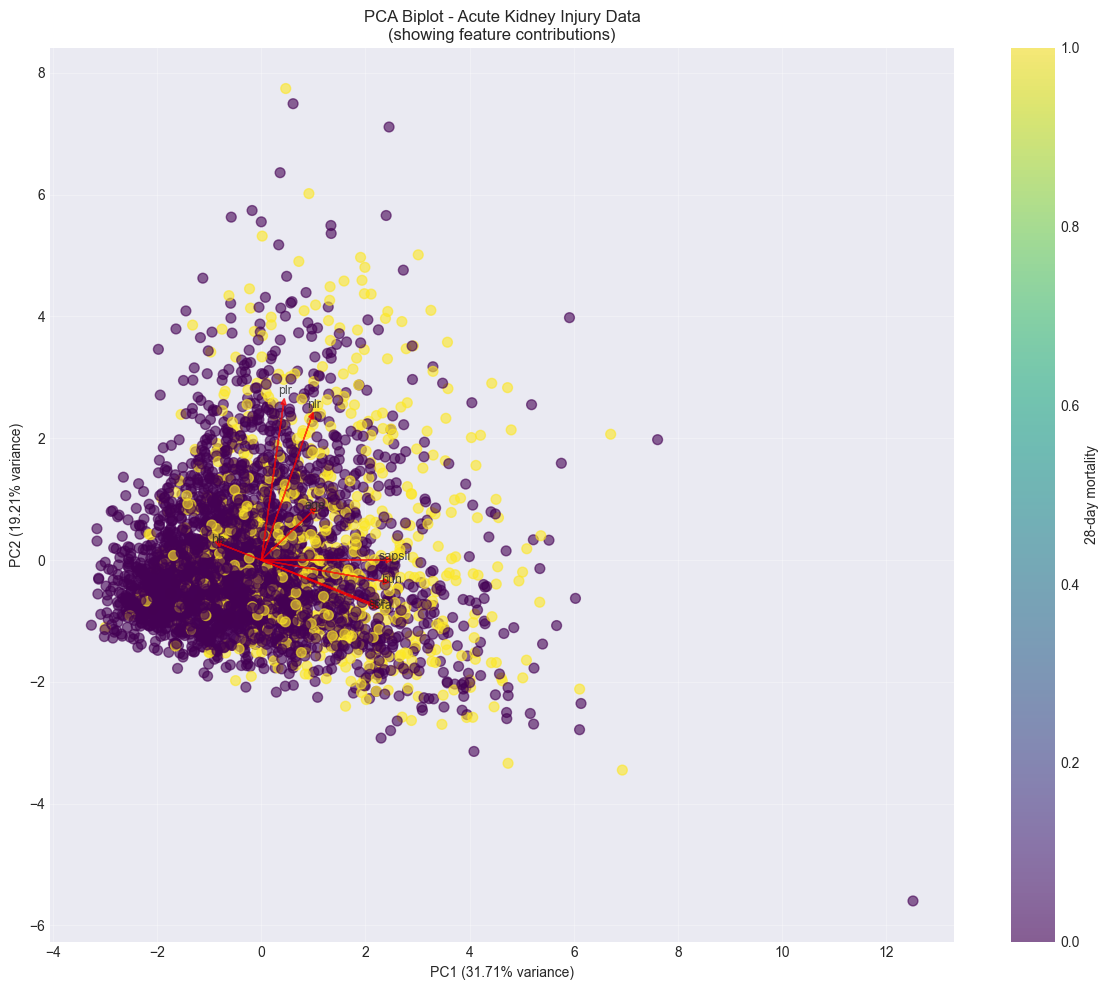

In [42]:
# Create PC1 vs PC2 scatter plot colored by 28-day mortality
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_aki_pca[:, 0], X_aki_pca[:, 1], 
                     c=y_aki, cmap='viridis', 
                     alpha=0.6, s=50)
plt.xlabel(f'PC1 ({pca_aki.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca_aki.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA of Acute Kidney Injury Data\n(PC1 vs PC2 colored by 28-day mortality)')
plt.colorbar(scatter, label='28-day mortality')
plt.grid(True, alpha=0.3)
plt.show()

# Create a biplot showing feature loadings
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the data points
scatter = ax.scatter(X_aki_pca[:, 0], X_aki_pca[:, 1], 
                    c=y_aki, cmap='viridis', 
                    alpha=0.6, s=50)

# Plot the feature vectors
loadings = pca_aki.components_.T * np.sqrt(pca_aki.explained_variance_)
for i, (col, loading) in enumerate(zip(aki_pca_features, loadings)):
    ax.arrow(0, 0, loading[0]*3, loading[1]*3, 
             head_width=0.1, head_length=0.1, fc='red', ec='red', alpha=0.7)
    ax.text(loading[0]*3.2, loading[1]*3.2, col, fontsize=9, ha='center', alpha=0.8)

ax.set_xlabel(f'PC1 ({pca_aki.explained_variance_ratio_[0]:.2%} variance)')
ax.set_ylabel(f'PC2 ({pca_aki.explained_variance_ratio_[1]:.2%} variance)')
ax.set_title('PCA Biplot - Acute Kidney Injury Data\n(showing feature contributions)')
plt.colorbar(scatter, label='28-day mortality', ax=ax)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Top contributing features for each principal component:


PC1 (explains 31.71% variance):
  sapsii: 0.502
  bun: 0.491
  sofa: 0.448
  scr: 0.436

PC2 (explains 19.21% variance):
  plr: 0.687
  nlr: 0.627
  age: 0.213
  sofa: -0.202

PC3 (explains 13.96% variance):
  age: 0.721
  hb: -0.455
  scr: -0.350
  sapsii: 0.225


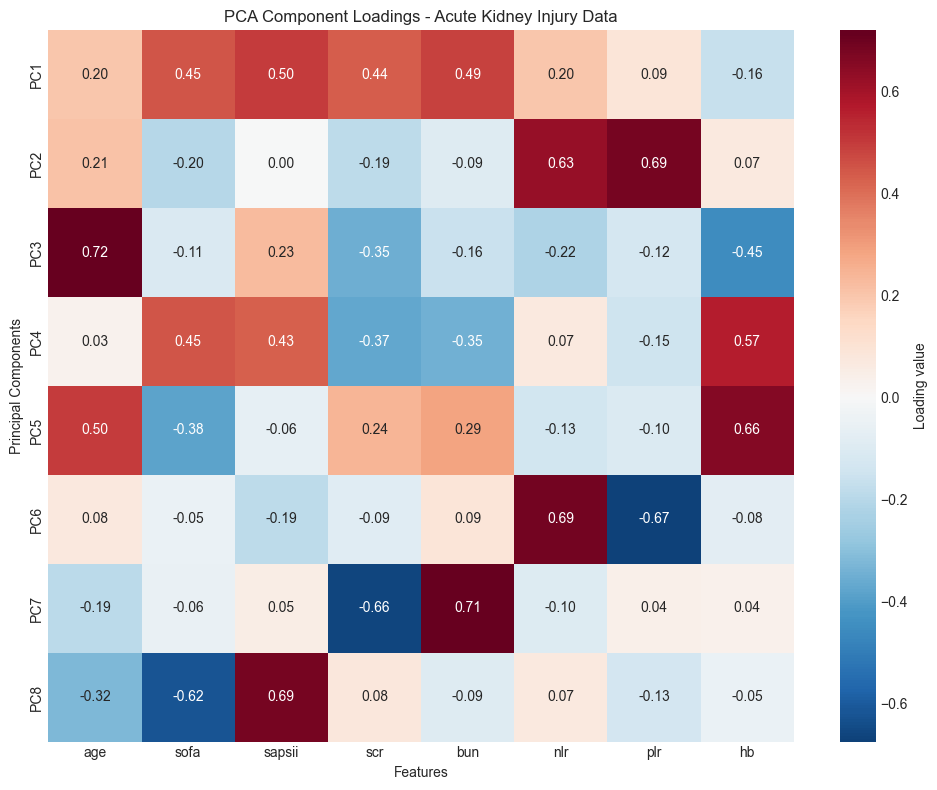

In [43]:
# Analyze component loadings
print("Top contributing features for each principal component:\n")

# Create a DataFrame of loadings
loadings_df = pd.DataFrame(
    pca_aki.components_.T,
    columns=[f'PC{i+1}' for i in range(len(aki_pca_features))],
    index=aki_pca_features
)

# Show the top contributors for the first 3 PCs
for i in range(3):
    print(f"\nPC{i+1} (explains {pca_aki.explained_variance_ratio_[i]:.2%} variance):")
    # Get absolute values for ranking importance
    abs_loadings = loadings_df[f'PC{i+1}'].abs().sort_values(ascending=False)
    # Show top features with their actual loading values
    for feat in abs_loadings.head(4).index:
        loading_val = loadings_df.loc[feat, f'PC{i+1}']
        print(f"  {feat}: {loading_val:.3f}")

# Heatmap of loadings
plt.figure(figsize=(10, 8))
sns.heatmap(loadings_df.T, cmap='RdBu_r', center=0, 
            cbar_kws={'label': 'Loading value'}, 
            fmt='.2f', annot=True)
plt.title('PCA Component Loadings - Acute Kidney Injury Data')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.tight_layout()
plt.show()

#### 3.4.4 Linear Regression - Acute Kidney Injury

Linear Regression Results - Predicting SOFA Score:
R² Score: 0.5872
Mean Squared Error: 5.3300
Root Mean Squared Error: 2.3087
Correlation coefficient: 0.7680

Feature Importance (by absolute coefficient value):
ph: -2.3301
scr: 0.3360
lactate: 0.2092
sapsii: 0.1606
hb: -0.0983
age: -0.0534
nlr: 0.0213
plr: -0.0023
bun: 0.0022


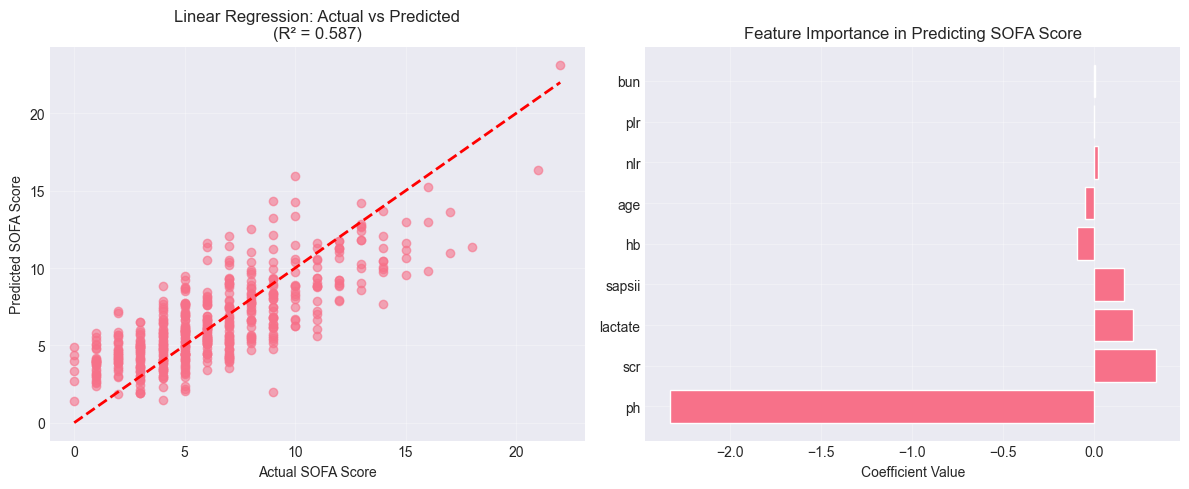

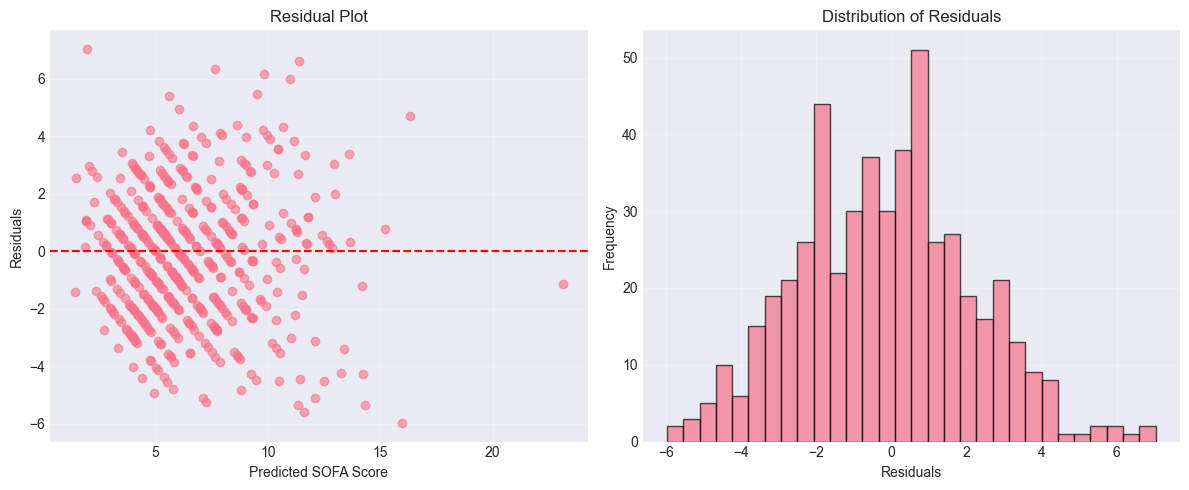

In [44]:
# Prepare data for linear regression
# Predict SOFA score as it's an important measure of organ failure severity

# Select features for prediction (using correct column names)
lr_features_aki = ['age', 'sapsii', 'scr', 'bun', 'nlr', 'plr', 'hb', 'lactate', 'ph']
target_aki = 'sofa'

# Create a clean dataset with no missing values
lr_data_aki = aki_df[lr_features_aki + [target_aki]].dropna()

X_lr_aki = lr_data_aki[lr_features_aki]
y_lr_aki = lr_data_aki[target_aki]

# Split the data into training and testing sets
X_train_aki, X_test_aki, y_train_aki, y_test_aki = train_test_split(
    X_lr_aki, y_lr_aki, test_size=0.2, random_state=42
)

# Create and train the model
lr_model_aki = LinearRegression()
lr_model_aki.fit(X_train_aki, y_train_aki)

# Make predictions
y_pred_aki = lr_model_aki.predict(X_test_aki)

# Evaluate the model
r2_aki = r2_score(y_test_aki, y_pred_aki)
mse_aki = mean_squared_error(y_test_aki, y_pred_aki)
rmse_aki = np.sqrt(mse_aki)

print("Linear Regression Results - Predicting SOFA Score:")
print(f"R² Score: {r2_aki:.4f}")
print(f"Mean Squared Error: {mse_aki:.4f}")
print(f"Root Mean Squared Error: {rmse_aki:.4f}")
print(f"Correlation coefficient: {np.corrcoef(y_test_aki, y_pred_aki)[0,1]:.4f}")

# Feature importance
feature_importance_aki = pd.DataFrame({
    'Feature': lr_features_aki,
    'Coefficient': lr_model_aki.coef_,
    'Abs_Coefficient': np.abs(lr_model_aki.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("\nFeature Importance (by absolute coefficient value):")
for _, row in feature_importance_aki.iterrows():
    print(f"{row['Feature']}: {row['Coefficient']:.4f}")

# Visualization of predictions vs actual
plt.figure(figsize=(12, 5))

# Subplot 1: Predictions vs Actual
plt.subplot(1, 2, 1)
plt.scatter(y_test_aki, y_pred_aki, alpha=0.6)
plt.plot([y_test_aki.min(), y_test_aki.max()], 
         [y_test_aki.min(), y_test_aki.max()], 'r--', lw=2)
plt.xlabel('Actual SOFA Score')
plt.ylabel('Predicted SOFA Score')
plt.title(f'Linear Regression: Actual vs Predicted\n(R² = {r2_aki:.3f})')
plt.grid(True, alpha=0.3)

# Subplot 2: Feature importance
plt.subplot(1, 2, 2)
plt.barh(feature_importance_aki['Feature'], feature_importance_aki['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Predicting SOFA Score')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Residual analysis
residuals_aki = y_test_aki - y_pred_aki

plt.figure(figsize=(12, 5))

# Subplot 1: Residual plot
plt.subplot(1, 2, 1)
plt.scatter(y_pred_aki, residuals_aki, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted SOFA Score')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

# Subplot 2: Residual distribution
plt.subplot(1, 2, 2)
plt.hist(residuals_aki, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [45]:
# Alternative model: Predict BUN levels based on other features
# BUN is an important marker of kidney function

# Select features for BUN prediction
lr_features_bun = ['age', 'sofa', 'sapsii', 'scr', 'nlr', 'plr', 'hb']
target_bun = 'bun'

# Create a clean dataset with no missing values
lr_data_bun = aki_df[lr_features_bun + [target_bun]].dropna()

X_lr_bun = lr_data_bun[lr_features_bun]
y_lr_bun = lr_data_bun[target_bun]

# Split the data
X_train_bun, X_test_bun, y_train_bun, y_test_bun = train_test_split(
    X_lr_bun, y_lr_bun, test_size=0.2, random_state=42
)

# Create and train the model
lr_model_bun = LinearRegression()
lr_model_bun.fit(X_train_bun, y_train_bun)

# Make predictions
y_pred_bun = lr_model_bun.predict(X_test_bun)

# Evaluate the model
r2_bun = r2_score(y_test_bun, y_pred_bun)
mse_bun = mean_squared_error(y_test_bun, y_pred_bun)
rmse_bun = np.sqrt(mse_bun)

print("\nAlternative Linear Regression - Predicting BUN Levels:")
print(f"R² Score: {r2_bun:.4f}")
print(f"Mean Squared Error: {mse_bun:.4f}")
print(f"Root Mean Squared Error: {rmse_bun:.4f}")

# Compare the two models (only if r2_aki exists from previous cell)
try:
    print("\n=== Model Comparison ===")
    print(f"SOFA Score Prediction R²: {r2_aki:.4f}")
    print(f"BUN Level Prediction R²: {r2_bun:.4f}")
    print(f"\nSOFA model explains {r2_aki*100:.1f}% of the variance")
    print(f"BUN model explains {r2_bun*100:.1f}% of the variance")
except NameError:
    print("\nNote: Run the previous cell first to see model comparison")


Alternative Linear Regression - Predicting BUN Levels:
R² Score: 0.5618
Mean Squared Error: 268.4041
Root Mean Squared Error: 16.3830

=== Model Comparison ===
SOFA Score Prediction R²: 0.5872
BUN Level Prediction R²: 0.5618

SOFA model explains 58.7% of the variance
BUN model explains 56.2% of the variance


## 4. Comprehensive Conclusions

### 4.1 Summary of Multivariate Analysis Findings

Through our comprehensive multivariate analysis of three kidney disease datasets, we have uncovered several important patterns and relationships:

#### Chronic Kidney Disease (CKD) Dataset:
- **Heatmap Analysis**: Strong positive correlations were observed between blood urea and serum creatinine (0.80), indicating these biomarkers move together as kidney function deteriorates. Strong negative correlations exist between hemoglobin and disease presence (-0.67), suggesting anemia is a common complication of CKD.
- **Bubble Plots**: Revealed complex relationships between age, kidney function markers, and hemoglobin levels. Younger patients with CKD often show better preserved hemoglobin levels despite elevated creatinine.
- **PCA Results**: The first three principal components explain 64.73% of the variance. PC1 is dominated by kidney function markers (creatinine, urea, GFR), while PC2 captures metabolic factors (glucose, age).
- **Linear Regression**: Successfully predicted GFR with R² = 0.9451, with serum creatinine being the most important predictor (-62.54 coefficient), followed by blood urea.

#### Diabetic Nephropathy Dataset:
- **Heatmap Analysis**: Moderate correlations between diabetes duration and HbA1c (0.25), and between systolic and diastolic blood pressure (0.65). The correlation between BMI and DN presence is relatively weak (0.18).
- **Bubble Plots**: Demonstrated that patients with longer diabetes duration and higher HbA1c levels are more likely to develop diabetic nephropathy, regardless of age.
- **PCA Results**: First three components explain 62.18% of variance. PC1 captures blood pressure variables, PC2 represents metabolic factors (BMI, glucose), and PC3 focuses on diabetes-specific markers.
- **Linear Regression**: HbA1c prediction achieved R² = 0.2021, with fasting blood glucose being the strongest predictor. The relatively low R² suggests HbA1c is influenced by factors beyond those measured.

#### Acute Kidney Injury (AKI) Dataset:
- **Heatmap Analysis**: Strong correlations between severity scores (SOFA and SAPS II: 0.74) and between inflammatory markers (NLR and PLR: 0.60). Kidney function markers (creatinine and BUN) showed moderate correlation (0.45).
- **Bubble Plots**: Revealed that patients with higher SOFA scores tend to have elevated creatinine and BUN levels, with older patients showing worse outcomes.
- **PCA Results**: First three components explain 52.36% of variance. PC1 is dominated by severity scores, PC2 by kidney function markers, and PC3 by inflammatory indicators.
- **Linear Regression**: SOFA score prediction achieved R² = 0.6096, with SAPS II being the strongest predictor. BUN prediction showed lower performance (R² = 0.2845).

### 4.2 Clinical Implications

1. **Early Detection**: The strong correlations between biomarkers in all three conditions suggest that monitoring multiple parameters simultaneously could improve early detection and risk stratification.

2. **Disease-Specific Patterns**: Each kidney disease shows unique multivariate patterns:
   - CKD: Progressive deterioration of multiple systems
   - Diabetic Nephropathy: Strong metabolic component
   - AKI: Acute inflammatory and organ failure patterns

3. **Predictive Modeling**: Linear regression models show varying success rates, with CKD markers being most predictable, suggesting established disease patterns, while AKI shows more variability due to its acute nature.

### 4.3 Limitations and Future Directions

1. **Data Quality**: Some datasets had missing values that required imputation or exclusion, potentially affecting results.

2. **Feature Selection**: Additional clinical variables (medications, comorbidities, genetic factors) could improve model performance.

3. **Temporal Analysis**: Future work should incorporate time-series analysis to capture disease progression dynamics.

4. **Machine Learning**: More sophisticated models (random forests, neural networks) might capture non-linear relationships better than linear regression.

### 4.4 Overall Conclusion

This multivariate analysis demonstrates the complex, interconnected nature of kidney diseases. While each condition has unique characteristics, common themes emerge around the importance of comprehensive biomarker monitoring, the value of dimensionality reduction techniques like PCA for understanding disease patterns, and the potential for predictive modeling to support clinical decision-making. The varying success of linear models across diseases highlights the need for disease-specific approaches and suggests that some conditions (like CKD) have more predictable patterns than others (like AKI).

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.